In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_mm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'ManagedMoney_NetPosition_change': ['prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'F2_RolledPrice_change',
  'F3_RolledPrice_change'],
 'ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F2_RolledPrice_change',
  'F3_RolledPrice_change'],
 'ManagedMoney_ShortPosition_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change',
  'F2_RolledPrice_change'],
 'ManagedMoney_NetPosition_to_openinterest_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2026-01-29 20:13:46,347] A new study created in memory with name: no-name-31f0e917-b189-471b-91e7-d31eef5874d5
  0%|                                                    | 0/80 [00:00<?, ?it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.113e+10, tolerance: 3.127e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.967e+09, tolerance: 3.517e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site

[I 2026-01-29 20:13:51,667] Trial 0 finished with value: 0.4672284310950049 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.4672284310950049.
[I 2026-01-29 20:13:51,821] Trial 1 finished with value: 0.4668212499855791 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.4672284310950049.


Best trial: 2. Best value: 0.559841:   4%|▎      | 3/80 [00:21<11:10,  8.70s/it]

[I 2026-01-29 20:14:08,192] Trial 2 finished with value: 0.5598411722313182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5598411722313182.


Best trial: 2. Best value: 0.559841:   6%|▍      | 5/80 [00:22<04:36,  3.68s/it]

[I 2026-01-29 20:14:09,294] Trial 3 finished with value: 0.5225753786785508 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5598411722313182.
[I 2026-01-29 20:14:09,391] Trial 4 finished with value: 0.4672663580576081 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5598411722313182.


Best trial: 2. Best value: 0.559841:   8%|▌      | 6/80 [00:23<03:02,  2.47s/it]

[I 2026-01-29 20:14:09,506] Trial 5 finished with value: 0.4668208180184083 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5598411722313182.
[I 2026-01-29 20:14:09,613] Trial 6 finished with value: 0.44370823127780445 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5598411722313182.


Best trial: 2. Best value: 0.559841:  10%|▋      | 8/80 [00:23<01:35,  1.32s/it]

[I 2026-01-29 20:14:09,800] Trial 7 finished with value: 0.4668208180184083 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5598411722313182.


Best trial: 2. Best value: 0.559841:  12%|▊     | 10/80 [00:25<01:12,  1.03s/it]

[I 2026-01-29 20:14:11,305] Trial 8 finished with value: 0.5390300114728034 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5598411722313182.
[I 2026-01-29 20:14:11,424] Trial 9 finished with value: 0.4668208180184083 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5598411722313182.


Best trial: 10. Best value: 0.559844:  14%|▋    | 11/80 [00:40<05:51,  5.10s/it]

[I 2026-01-29 20:14:27,027] Trial 10 finished with value: 0.5598442665454003 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5598442665454003.


Best trial: 10. Best value: 0.559844:  15%|▊    | 12/80 [00:55<09:03,  8.00s/it]

[I 2026-01-29 20:14:42,294] Trial 11 finished with value: 0.5598442665454003 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5598442665454003.


Best trial: 10. Best value: 0.559844:  16%|▊    | 13/80 [01:09<10:38,  9.53s/it]

[I 2026-01-29 20:14:55,587] Trial 12 finished with value: 0.5598442665454003 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5598442665454003.


Best trial: 10. Best value: 0.559844:  18%|▉    | 14/80 [01:16<09:49,  8.93s/it]

[I 2026-01-29 20:15:03,053] Trial 13 finished with value: 0.5415130832974664 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.5598442665454003.


Best trial: 14. Best value: 0.562358:  19%|▉    | 15/80 [01:45<16:08, 14.91s/it]

[I 2026-01-29 20:15:32,262] Trial 14 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  20%|█    | 16/80 [02:13<20:04, 18.81s/it]

[I 2026-01-29 20:16:00,359] Trial 15 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  21%|█    | 17/80 [02:43<22:56, 21.86s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.819e+07, tolerance: 3.517e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+09, tolerance: 3.127e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:16:29,382] Trial 16 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:16:29,495] Trial 17 finished with value: 0.47724978280220187 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5623581164788785.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+08, tolerance: 3.098e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+08, tolerance: 3.548e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 20:16:29,681] Trial 18 finished with value: 0.468866492140955 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  25%|█▎   | 20/80 [03:03<13:53, 13.90s/it]

[I 2026-01-29 20:16:49,731] Trial 19 finished with value: 0.5411812796136443 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  26%|█▎   | 21/80 [03:27<16:24, 16.68s/it]

[I 2026-01-29 20:17:14,311] Trial 20 finished with value: 0.562282996622711 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  28%|█▍   | 22/80 [03:55<19:01, 19.69s/it]

[I 2026-01-29 20:17:42,059] Trial 21 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  29%|█▍   | 23/80 [04:18<19:35, 20.63s/it]

[I 2026-01-29 20:18:05,079] Trial 22 finished with value: 0.562282996622711 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  30%|█▌   | 24/80 [04:23<15:08, 16.22s/it]

[I 2026-01-29 20:18:10,275] Trial 23 finished with value: 0.5615490456395202 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  31%|█▌   | 25/80 [04:49<17:17, 18.87s/it]

[I 2026-01-29 20:18:35,640] Trial 24 finished with value: 0.56159913915457 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  32%|█▋   | 26/80 [05:19<20:02, 22.26s/it]

[I 2026-01-29 20:19:06,110] Trial 25 finished with value: 0.5571900539250634 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  34%|█▋   | 27/80 [05:52<22:23, 25.34s/it]

[I 2026-01-29 20:19:38,818] Trial 26 finished with value: 0.5388268685889545 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2026-01-29 20:19:40,645] Trial 27 finished with value: 0.46821972450509364 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:19:40,711] Trial 28 finished with value: 0.4800114389085519 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.5623581164788785.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+11, tolerance: 3.273e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.692e+10, tolerance: 2.827e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 20:19:40,957] Trial 29 finished with value: 0.4669588347193453 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  39%|█▉   | 31/80 [06:08<08:55, 10.94s/it]

[I 2026-01-29 20:19:54,695] Trial 30 finished with value: 0.5417138723585361 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  40%|██   | 32/80 [06:37<12:36, 15.75s/it]

[I 2026-01-29 20:20:24,109] Trial 31 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  41%|██   | 33/80 [07:04<14:42, 18.78s/it]

[I 2026-01-29 20:20:51,024] Trial 32 finished with value: 0.5616078520314713 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  42%|██▏  | 34/80 [07:27<15:16, 19.92s/it]

[I 2026-01-29 20:21:13,873] Trial 33 finished with value: 0.56159913915457 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  44%|██▏  | 35/80 [07:35<12:22, 16.51s/it]

[I 2026-01-29 20:21:21,839] Trial 34 finished with value: 0.5515463646340619 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  45%|██▎  | 36/80 [08:08<15:35, 21.25s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+11, tolerance: 3.554e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+11, tolerance: 3.487e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:21:54,742] Trial 35 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:21:54,807] Trial 36 finished with value: 0.4785507479927953 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 14 with value: 0.5623581164788785.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+11, tolerance: 2.977e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+11, tolerance: 3.158e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 20:21:55,063] Trial 37 finished with value: 0.4669586818489592 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  49%|██▍  | 39/80 [08:28<09:22, 13.72s/it]

[I 2026-01-29 20:22:15,023] Trial 38 finished with value: 0.561555234855463 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  51%|██▌  | 41/80 [08:43<06:36, 10.17s/it]

[I 2026-01-29 20:22:29,356] Trial 39 finished with value: 0.5416710090541457 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:22:29,480] Trial 40 finished with value: 0.4668208180184083 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  52%|██▋  | 42/80 [09:15<10:25, 16.46s/it]

[I 2026-01-29 20:23:02,244] Trial 41 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  54%|██▋  | 43/80 [09:45<12:31, 20.32s/it]

[I 2026-01-29 20:23:32,290] Trial 42 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  55%|██▊  | 44/80 [10:15<13:53, 23.15s/it]

[I 2026-01-29 20:24:02,356] Trial 43 finished with value: 0.5616078520314715 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  56%|██▊  | 45/80 [10:38<13:19, 22.85s/it]

[I 2026-01-29 20:24:24,518] Trial 44 finished with value: 0.562282996622711 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  59%|██▉  | 47/80 [11:04<09:17, 16.88s/it]

[I 2026-01-29 20:24:51,045] Trial 45 finished with value: 0.5616078520314713 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:24:51,144] Trial 46 finished with value: 0.4775898410980847 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:24:51,242] Trial 47 finished with value: 0.47724979347877305 and parameters: {'model': 'enet', 'alpha': 6.150833182882781e-06, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  61%|███  | 49/80 [11:04<04:44,  9.19s/it]

[I 2026-01-29 20:24:51,368] Trial 48 finished with value: 0.4668208180184083 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  62%|███▏ | 50/80 [11:23<05:42, 11.41s/it]

[I 2026-01-29 20:25:09,568] Trial 49 finished with value: 0.5590459718152253 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  64%|███▏ | 51/80 [11:49<07:23, 15.29s/it]

[I 2026-01-29 20:25:35,876] Trial 50 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  65%|███▎ | 52/80 [12:16<08:34, 18.36s/it]

[I 2026-01-29 20:26:02,470] Trial 51 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  66%|███▎ | 53/80 [12:42<09:18, 20.69s/it]

[I 2026-01-29 20:26:29,183] Trial 52 finished with value: 0.5616078520314713 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  68%|███▍ | 54/80 [13:09<09:41, 22.38s/it]

[I 2026-01-29 20:26:55,802] Trial 53 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  69%|███▍ | 55/80 [13:11<06:54, 16.58s/it]

[I 2026-01-29 20:26:58,136] Trial 54 finished with value: 0.5381326574479938 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  70%|███▌ | 56/80 [13:33<07:17, 18.24s/it]

[I 2026-01-29 20:27:20,394] Trial 55 finished with value: 0.562282996622711 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  71%|███▌ | 57/80 [13:42<05:52, 15.35s/it]

[I 2026-01-29 20:27:28,803] Trial 56 finished with value: 0.4895776796322625 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  72%|███▋ | 58/80 [13:51<04:58, 13.59s/it]

[I 2026-01-29 20:27:38,228] Trial 57 finished with value: 0.5600132770460287 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  74%|███▋ | 59/80 [14:19<06:11, 17.69s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+11, tolerance: 3.426e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+11, tolerance: 3.554e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:28:05,603] Trial 58 finished with value: 0.5600209134141599 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:28:05,793] Trial 59 finished with value: 0.4669589599368685 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 14 with value: 0.5623581164788785.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2026-01-29 20:28:07,480] Trial 60 finished with value: 0.468269131732555 and parameters: {'model': 'enet', 'alpha': 1.4563007780702217e-05, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  78%|███▉ | 62/80 [14:48<04:22, 14.59s/it]

[I 2026-01-29 20:28:34,601] Trial 61 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  79%|███▉ | 63/80 [15:15<05:14, 18.52s/it]

[I 2026-01-29 20:29:02,313] Trial 62 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  80%|████ | 64/80 [15:43<05:39, 21.22s/it]

[I 2026-01-29 20:29:29,856] Trial 63 finished with value: 0.5616078520314713 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  81%|████ | 65/80 [16:11<05:47, 23.14s/it]

[I 2026-01-29 20:29:57,461] Trial 64 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  82%|████▏| 66/80 [16:36<05:33, 23.80s/it]

[I 2026-01-29 20:30:22,807] Trial 65 finished with value: 0.5519191088458877 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  85%|████▎| 68/80 [17:05<03:32, 17.69s/it]

[I 2026-01-29 20:30:51,337] Trial 66 finished with value: 0.5600209134141599 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.
[I 2026-01-29 20:30:51,454] Trial 67 finished with value: 0.4668208180184083 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  86%|████▎| 69/80 [17:19<03:03, 16.67s/it]

[I 2026-01-29 20:31:05,719] Trial 68 finished with value: 0.5388304425771612 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  88%|████▍| 70/80 [17:43<03:09, 18.91s/it]

[I 2026-01-29 20:31:29,897] Trial 69 finished with value: 0.56159913915457 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  89%|████▍| 71/80 [18:10<03:11, 21.27s/it]

[I 2026-01-29 20:31:56,651] Trial 70 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  90%|████▌| 72/80 [18:42<03:16, 24.60s/it]

[I 2026-01-29 20:32:29,033] Trial 71 finished with value: 0.5623581164788785 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  91%|████▌| 73/80 [19:11<03:00, 25.75s/it]

[I 2026-01-29 20:32:57,453] Trial 72 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  92%|████▋| 74/80 [19:44<02:49, 28.20s/it]

[I 2026-01-29 20:33:31,335] Trial 73 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  94%|████▋| 75/80 [20:19<02:30, 30.03s/it]

[I 2026-01-29 20:34:05,683] Trial 74 finished with value: 0.5623581164788783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  95%|████▊| 76/80 [20:19<01:24, 21.18s/it]

[I 2026-01-29 20:34:06,197] Trial 75 finished with value: 0.4689315149306623 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  96%|████▊| 77/80 [20:51<01:12, 24.29s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+11, tolerance: 3.554e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.292e+11, tolerance: 3.487e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:34:37,769] Trial 76 finished with value: 0.5616078520314713 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5623581164788785.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+11, tolerance: 3.523e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+11, tolerance: 3.273e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 20:34:38,058] Trial 77 finished with value: 0.4669587275627972 and parameters: {'model': 'lasso', 'alpha': 0.00021935244301421607}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358:  99%|████▉| 79/80 [20:58<00:14, 14.14s/it]

[I 2026-01-29 20:34:45,288] Trial 78 finished with value: 0.5376728978862734 and parameters: {'model': 'hgbm', 'learning_rate': 0.007807986931204357, 'max_depth': 9, 'max_iter': 500, 'l2_regularization': 0.9669109423262804, 'max_leaf_nodes': 191}. Best is trial 14 with value: 0.5623581164788785.


Best trial: 14. Best value: 0.562358: 100%|█████| 80/80 [21:21<00:00, 16.02s/it]
[I 2026-01-29 20:35:08,244] A new study created in memory with name: no-name-7ce03cac-6f70-48b8-9627-9cca9140605d


[I 2026-01-29 20:35:08,230] Trial 79 finished with value: 0.562282996622711 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5623581164788785.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.4670, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.4668, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5388, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.4896, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.4668, params={'model': 'ols'}
enet: score=0.4437, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893

  0%|                                                    | 0/80 [00:00<?, ?it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.822e+08, tolerance: 2.183e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.526e+08, tolerance: 2.006e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:35:08,483] Trial 0 finished with value: 0.38195721971007496 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.38195721971007496.
[I 2026-01-29 20:35:08,548] Trial 1 finished with value: 0.3812607903357288 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.38195721971007496.


Best trial: 2. Best value: 0.430841:   4%|▎      | 3/80 [00:14<06:48,  5.31s/it]

[I 2026-01-29 20:35:22,631] Trial 2 finished with value: 0.43084073643439885 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:   6%|▍      | 5/80 [00:15<03:19,  2.66s/it]

[I 2026-01-29 20:35:23,871] Trial 3 finished with value: 0.38098537731133103 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.43084073643439885.
[I 2026-01-29 20:35:24,033] Trial 4 finished with value: 0.381950053914398 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:   8%|▌      | 6/80 [00:16<02:16,  1.85s/it]

[I 2026-01-29 20:35:24,130] Trial 5 finished with value: 0.38126012221459066 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.43084073643439885.
[I 2026-01-29 20:35:24,262] Trial 6 finished with value: 0.29939234825340694 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:  10%|▋      | 8/80 [00:16<01:12,  1.01s/it]

[I 2026-01-29 20:35:24,358] Trial 7 finished with value: 0.38126012221459066 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:  12%|▊     | 10/80 [00:17<00:58,  1.21it/s]

[I 2026-01-29 20:35:25,658] Trial 8 finished with value: 0.40617182287604103 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.43084073643439885.
[I 2026-01-29 20:35:25,789] Trial 9 finished with value: 0.38126012221459066 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:  14%|▊     | 11/80 [00:32<05:21,  4.65s/it]

[I 2026-01-29 20:35:40,479] Trial 10 finished with value: 0.4308375770723662 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:  15%|▉     | 12/80 [00:45<08:11,  7.22s/it]

[I 2026-01-29 20:35:54,213] Trial 11 finished with value: 0.4308375770723662 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:  16%|▉     | 13/80 [00:59<10:02,  9.00s/it]

[I 2026-01-29 20:36:07,602] Trial 12 finished with value: 0.4308375770723662 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 2. Best value: 0.430841:  18%|█     | 14/80 [01:06<09:11,  8.36s/it]

[I 2026-01-29 20:36:14,416] Trial 13 finished with value: 0.4148281987171551 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.43084073643439885.


Best trial: 14. Best value: 0.432228:  19%|▉    | 15/80 [01:32<14:39, 13.54s/it]

[I 2026-01-29 20:36:40,391] Trial 14 finished with value: 0.43222754207140374 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.43222754207140374.


Best trial: 15. Best value: 0.43224:  20%|█▏    | 16/80 [01:57<18:15, 17.11s/it]

[I 2026-01-29 20:37:06,013] Trial 15 finished with value: 0.4322396772094843 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  21%|█▎    | 17/80 [02:24<20:59, 20.00s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+09, tolerance: 1.907e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.932e+08, tolerance: 2.000e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:37:32,857] Trial 16 finished with value: 0.43223784278307886 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:37:32,936] Trial 17 finished with value: 0.40028523843594077 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.4322396772094843.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+07, tolerance: 2.064e+07
  model = cd_fast.enet_coordinate_descent(
Best trial: 15. Best value: 0.43224:  24%|█▍    | 19/80 [02:24<11:03, 10.88s/it]

[I 2026-01-29 20:37:33,106] Trial 18 finished with value: 0.38494609962871096 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  25%|█▌    | 20/80 [02:39<11:53, 11.89s/it]

[I 2026-01-29 20:37:48,070] Trial 19 finished with value: 0.4171026585474547 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  26%|█▌    | 21/80 [02:58<13:28, 13.71s/it]

[I 2026-01-29 20:38:06,911] Trial 20 finished with value: 0.41285591824445494 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  28%|█▋    | 22/80 [03:27<17:17, 17.89s/it]

[I 2026-01-29 20:38:36,044] Trial 21 finished with value: 0.43222754207140374 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  29%|█▋    | 23/80 [03:51<18:24, 19.37s/it]

[I 2026-01-29 20:38:59,247] Trial 22 finished with value: 0.43197470452292647 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  30%|█▊    | 24/80 [03:55<14:09, 15.17s/it]

[I 2026-01-29 20:39:03,891] Trial 23 finished with value: 0.43127855225046724 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  31%|█▉    | 25/80 [04:22<16:57, 18.50s/it]

[I 2026-01-29 20:39:30,562] Trial 24 finished with value: 0.43161414036772167 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  32%|█▉    | 26/80 [04:53<20:02, 22.27s/it]

[I 2026-01-29 20:40:01,958] Trial 25 finished with value: 0.42886389188527163 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  34%|██    | 27/80 [05:20<20:51, 23.60s/it]

[I 2026-01-29 20:40:28,745] Trial 26 finished with value: 0.42188857509293853 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2026-01-29 20:40:31,125] Trial 27 finished with value: 0.35658613981165516 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:40:31,217] Trial 28 finished with value: 0.3854614112905144 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 15 with value: 0.4322396772094843.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.016e+10, tolerance: 2.095e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+10, tolerance: 2.050e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 20:40:31,448] Trial 29 finished with value: 0.38148021285752226 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  39%|██▎   | 31/80 [05:38<08:53, 10.89s/it]

[I 2026-01-29 20:40:46,725] Trial 30 finished with value: 0.4168438222368777 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  40%|██▍   | 32/80 [06:06<12:19, 15.40s/it]

[I 2026-01-29 20:41:14,938] Trial 31 finished with value: 0.4322275948356963 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  41%|██▍   | 33/80 [06:36<15:07, 19.32s/it]

[I 2026-01-29 20:41:44,775] Trial 32 finished with value: 0.431738585462348 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  42%|██▌   | 34/80 [07:00<15:49, 20.65s/it]

[I 2026-01-29 20:42:08,865] Trial 33 finished with value: 0.4314879984498096 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  44%|██▋   | 35/80 [07:17<14:37, 19.49s/it]

[I 2026-01-29 20:42:25,450] Trial 34 finished with value: 0.40939240295135065 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  45%|██▋   | 36/80 [07:47<16:28, 22.48s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.274e+10, tolerance: 2.183e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.871e+10, tolerance: 2.094e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:42:55,251] Trial 35 finished with value: 0.4322267685152919 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:42:55,324] Trial 36 finished with value: 0.376414691667081 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 15 with value: 0.4322396772094843.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.777e+10, tolerance: 1.883e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.935e+10, tolerance: 2.000e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 20:42:55,530] Trial 37 finished with value: 0.3814799253604776 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  49%|██▉   | 39/80 [08:04<09:17, 13.59s/it]

[I 2026-01-29 20:43:12,928] Trial 38 finished with value: 0.4309964874422108 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  51%|███   | 41/80 [08:16<06:16,  9.65s/it]

[I 2026-01-29 20:43:24,875] Trial 39 finished with value: 0.4114688019777891 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:43:25,023] Trial 40 finished with value: 0.38126012221459066 and parameters: {'model': 'ols'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  52%|███▏  | 42/80 [08:46<09:37, 15.21s/it]

[I 2026-01-29 20:43:54,599] Trial 41 finished with value: 0.4322275948356963 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  54%|███▏  | 43/80 [09:17<12:04, 19.59s/it]

[I 2026-01-29 20:44:25,259] Trial 42 finished with value: 0.4322275948356963 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  55%|███▎  | 44/80 [09:50<14:14, 23.75s/it]

[I 2026-01-29 20:44:59,229] Trial 43 finished with value: 0.43148313403652266 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  56%|███▍  | 45/80 [10:18<14:33, 24.95s/it]

[I 2026-01-29 20:45:27,101] Trial 44 finished with value: 0.4320016125646146 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  57%|███▍  | 46/80 [10:53<15:49, 27.92s/it]

[I 2026-01-29 20:46:02,117] Trial 45 finished with value: 0.43173665976737857 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  60%|███▌  | 48/80 [10:54<07:24, 13.90s/it]

[I 2026-01-29 20:46:02,343] Trial 46 finished with value: 0.39788614783959925 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:46:02,500] Trial 47 finished with value: 0.4002852341605524 and parameters: {'model': 'enet', 'alpha': 6.150833182882781e-06, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  61%|███▋  | 49/80 [10:54<05:03,  9.79s/it]

[I 2026-01-29 20:46:02,615] Trial 48 finished with value: 0.38126012221459066 and parameters: {'model': 'ols'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  62%|███▊  | 50/80 [11:14<06:22, 12.75s/it]

[I 2026-01-29 20:46:22,312] Trial 49 finished with value: 0.4303632594876778 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  64%|███▊  | 51/80 [11:42<08:27, 17.50s/it]

[I 2026-01-29 20:46:50,956] Trial 50 finished with value: 0.4322267685152919 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  65%|███▉  | 52/80 [12:11<09:45, 20.91s/it]

[I 2026-01-29 20:47:19,852] Trial 51 finished with value: 0.4322275948356963 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  66%|███▉  | 53/80 [12:42<10:42, 23.81s/it]

[I 2026-01-29 20:47:50,418] Trial 52 finished with value: 0.43173813844794 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  68%|████  | 54/80 [13:10<10:56, 25.27s/it]

[I 2026-01-29 20:48:19,109] Trial 53 finished with value: 0.43223967720948425 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  69%|████▏ | 55/80 [13:13<07:41, 18.46s/it]

[I 2026-01-29 20:48:21,660] Trial 54 finished with value: 0.4136641187459635 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  70%|████▏ | 56/80 [13:35<07:47, 19.50s/it]

[I 2026-01-29 20:48:43,580] Trial 55 finished with value: 0.4297597220520279 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  71%|████▎ | 57/80 [13:44<06:16, 16.38s/it]

[I 2026-01-29 20:48:52,698] Trial 56 finished with value: 0.4315401238323377 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  72%|████▎ | 58/80 [13:51<04:57, 13.51s/it]

[I 2026-01-29 20:48:59,502] Trial 57 finished with value: 0.4109534720477351 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  74%|████▍ | 59/80 [14:20<06:24, 18.32s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.963e+10, tolerance: 2.183e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.529e+10, tolerance: 2.094e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:49:29,026] Trial 58 finished with value: 0.431738585462348 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  75%|████▌ | 60/80 [14:20<04:17, 12.88s/it]

[I 2026-01-29 20:49:29,240] Trial 59 finished with value: 0.3814804483494076 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  76%|████▌ | 61/80 [14:48<05:29, 17.33s/it]

[I 2026-01-29 20:49:56,952] Trial 60 finished with value: 0.43100855081684936 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  78%|████▋ | 62/80 [15:18<06:21, 21.18s/it]

[I 2026-01-29 20:50:27,127] Trial 61 finished with value: 0.4322275948356963 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  79%|████▋ | 63/80 [15:54<07:15, 25.63s/it]

[I 2026-01-29 20:51:03,117] Trial 62 finished with value: 0.43223784278307886 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  80%|████▊ | 64/80 [16:23<07:03, 26.47s/it]

[I 2026-01-29 20:51:31,570] Trial 63 finished with value: 0.4322396772094843 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2026-01-29 20:51:32,688] Trial 64 finished with value: 0.2948537158425565 and parameters: {'model': 'enet', 'alpha': 2.2047292731556803e-05, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  82%|████▉ | 66/80 [16:59<05:31, 23.71s/it]

[I 2026-01-29 20:52:07,690] Trial 65 finished with value: 0.4258897901269157 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  85%|█████ | 68/80 [17:29<03:35, 17.93s/it]

[I 2026-01-29 20:52:37,559] Trial 66 finished with value: 0.43097286993231704 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:52:37,681] Trial 67 finished with value: 0.38126012221459066 and parameters: {'model': 'ols'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  86%|█████▏| 69/80 [17:56<03:46, 20.58s/it]

[I 2026-01-29 20:53:04,471] Trial 68 finished with value: 0.43223784278307886 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  88%|█████▎| 70/80 [18:07<02:58, 17.84s/it]

[I 2026-01-29 20:53:15,900] Trial 69 finished with value: 0.4074188015123243 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  89%|█████▎| 71/80 [18:37<03:12, 21.34s/it]

[I 2026-01-29 20:53:45,416] Trial 70 finished with value: 0.43171646136514746 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  90%|█████▍| 72/80 [19:09<03:16, 24.61s/it]

[I 2026-01-29 20:54:17,654] Trial 71 finished with value: 0.4322396772094843 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  91%|█████▍| 73/80 [19:43<03:12, 27.54s/it]

[I 2026-01-29 20:54:52,017] Trial 72 finished with value: 0.4322396772094843 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  92%|█████▌| 74/80 [20:13<02:49, 28.25s/it]

[I 2026-01-29 20:55:21,923] Trial 73 finished with value: 0.43219789644920575 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  94%|█████▋| 75/80 [20:47<02:29, 29.87s/it]

[I 2026-01-29 20:55:55,587] Trial 74 finished with value: 0.4322396772094843 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  95%|█████▋| 76/80 [20:47<01:24, 21.05s/it]

[I 2026-01-29 20:55:55,976] Trial 75 finished with value: 0.3845434243985054 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  96%|█████▊| 77/80 [21:13<01:07, 22.35s/it]

[I 2026-01-29 20:56:21,437] Trial 76 finished with value: 0.4314421886941704 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224:  98%|█████▊| 78/80 [21:43<00:49, 24.66s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.208e+10, tolerance: 2.183e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.798e+10, tolerance: 2.094e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:56:51,478] Trial 77 finished with value: 0.4322396772094843 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.4322396772094843.
[I 2026-01-29 20:56:51,673] Trial 78 finished with value: 0.38148003447028045 and parameters: {'model': 'lasso', 'alpha': 0.0002780475574146242}. Best is trial 15 with value: 0.4322396772094843.


Best trial: 15. Best value: 0.43224: 100%|██████| 80/80 [21:51<00:00, 16.40s/it]
[I 2026-01-29 20:57:00,099] A new study created in memory with name: no-name-e7f02da3-35ea-414a-98b2-158edacbd9f2


[I 2026-01-29 20:57:00,090] Trial 79 finished with value: 0.3301017626842415 and parameters: {'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}. Best is trial 15 with value: 0.4322396772094843.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.3815, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.3764, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4129, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.3301, params={'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}
ols: score=0.3813, params={'model': 'ols'}
enet: score=0.2949, params={'model': 'enet', 'alpha': 2.2

  0%|                                                    | 0/80 [00:00<?, ?it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+08, tolerance: 1.752e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.974e+07, tolerance: 1.465e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 20:57:00,288] Trial 0 finished with value: 0.33728650742778465 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.33728650742778465.


Best trial: 0. Best value: 0.337287:   2%|▏      | 2/80 [00:00<00:11,  6.55it/s]

[I 2026-01-29 20:57:00,412] Trial 1 finished with value: 0.337180864266028 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.33728650742778465.


Best trial: 2. Best value: 0.395095:   4%|▎      | 3/80 [00:16<09:27,  7.37s/it]

[I 2026-01-29 20:57:16,370] Trial 2 finished with value: 0.39509467710116647 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:   6%|▍      | 5/80 [00:17<03:58,  3.19s/it]

[I 2026-01-29 20:57:17,521] Trial 3 finished with value: 0.35568674920024507 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.39509467710116647.
[I 2026-01-29 20:57:17,641] Trial 4 finished with value: 0.3372466661966682 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:   9%|▌      | 7/80 [00:17<01:48,  1.48s/it]

[I 2026-01-29 20:57:17,752] Trial 5 finished with value: 0.33718080156387825 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.39509467710116647.
[I 2026-01-29 20:57:17,878] Trial 6 finished with value: 0.28066701168913605 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:  10%|▋      | 8/80 [00:17<01:15,  1.04s/it]

[I 2026-01-29 20:57:17,987] Trial 7 finished with value: 0.33718080156387825 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:  12%|▊     | 10/80 [00:19<01:03,  1.10it/s]

[I 2026-01-29 20:57:19,691] Trial 8 finished with value: 0.38923230790222013 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.39509467710116647.
[I 2026-01-29 20:57:19,832] Trial 9 finished with value: 0.33718080156387825 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:  14%|▊     | 11/80 [00:35<06:08,  5.34s/it]

[I 2026-01-29 20:57:35,233] Trial 10 finished with value: 0.3950436232053296 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:  15%|▉     | 12/80 [00:51<09:52,  8.71s/it]

[I 2026-01-29 20:57:51,656] Trial 11 finished with value: 0.3950436232053296 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:  16%|▉     | 13/80 [01:06<11:47, 10.55s/it]

[I 2026-01-29 20:58:06,444] Trial 12 finished with value: 0.39504164937604724 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 2. Best value: 0.395095:  18%|█     | 14/80 [01:15<11:05, 10.09s/it]

[I 2026-01-29 20:58:15,459] Trial 13 finished with value: 0.3779964062818071 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.39509467710116647.


Best trial: 14. Best value: 0.395492:  19%|▉    | 15/80 [01:44<17:07, 15.80s/it]

[I 2026-01-29 20:58:44,506] Trial 14 finished with value: 0.39549183770027074 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.39549183770027074.


Best trial: 15. Best value: 0.395522:  20%|█    | 16/80 [02:15<21:44, 20.39s/it]

[I 2026-01-29 20:59:15,533] Trial 15 finished with value: 0.3955220927473826 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3955220927473826.


Best trial: 15. Best value: 0.395522:  21%|█    | 17/80 [02:45<24:19, 23.16s/it]

[I 2026-01-29 20:59:45,157] Trial 16 finished with value: 0.39548121776764705 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3955220927473826.


Best trial: 15. Best value: 0.395522:  24%|█▏   | 19/80 [02:45<11:37, 11.43s/it]

[I 2026-01-29 20:59:45,365] Trial 17 finished with value: 0.3390695885259684 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.3955220927473826.
[I 2026-01-29 20:59:45,530] Trial 18 finished with value: 0.3378199113331624 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.3955220927473826.


Best trial: 15. Best value: 0.395522:  25%|█▎   | 20/80 [03:02<13:11, 13.19s/it]

[I 2026-01-29 21:00:02,830] Trial 19 finished with value: 0.37659662255716164 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.3955220927473826.


Best trial: 15. Best value: 0.395522:  26%|█▎   | 21/80 [03:23<15:13, 15.49s/it]

[I 2026-01-29 21:00:23,670] Trial 20 finished with value: 0.384041918395605 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3955220927473826.


Best trial: 15. Best value: 0.395522:  28%|█▍   | 22/80 [03:53<19:12, 19.87s/it]

[I 2026-01-29 21:00:53,758] Trial 21 finished with value: 0.3954918377002708 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3955220927473826.


Best trial: 22. Best value: 0.395622:  29%|█▍   | 23/80 [04:21<21:03, 22.16s/it]

[I 2026-01-29 21:01:21,263] Trial 22 finished with value: 0.3956219226109742 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  30%|█▌   | 24/80 [04:50<22:37, 24.24s/it]

[I 2026-01-29 21:01:50,341] Trial 23 finished with value: 0.3956188219575777 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  31%|█▌   | 25/80 [05:26<25:23, 27.71s/it]

[I 2026-01-29 21:02:26,142] Trial 24 finished with value: 0.39499081946866105 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  32%|█▋   | 26/80 [05:53<24:52, 27.63s/it]

[I 2026-01-29 21:02:53,602] Trial 25 finished with value: 0.3913788953209614 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  34%|█▋   | 27/80 [06:00<18:49, 21.31s/it]

[I 2026-01-29 21:03:00,170] Trial 26 finished with value: 0.3663335868702405 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2026-01-29 21:03:01,892] Trial 27 finished with value: 0.3429351907711092 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 22 with value: 0.3956219226109742.
[I 2026-01-29 21:03:02,003] Trial 28 finished with value: 0.34241021412343264 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 22 with value: 0.3956219226109742.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e+10, tolerance: 1.465e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.977e+10, tolerance: 1.727e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[I 2026-01-29 21:03:02,230] Trial 29 finished with value: 0.33718279918056143 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  39%|█▉   | 31/80 [06:10<06:32,  8.01s/it]

[I 2026-01-29 21:03:11,079] Trial 30 finished with value: 0.3788237395530916 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  40%|██   | 32/80 [06:33<09:59, 12.49s/it]

[I 2026-01-29 21:03:34,013] Trial 31 finished with value: 0.3956219226109741 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  41%|██   | 33/80 [06:57<12:19, 15.74s/it]

[I 2026-01-29 21:03:57,331] Trial 32 finished with value: 0.3949783621515271 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  42%|██▏  | 34/80 [07:16<12:49, 16.73s/it]

[I 2026-01-29 21:04:16,382] Trial 33 finished with value: 0.39519916936786637 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  44%|██▏  | 35/80 [07:33<12:40, 16.89s/it]

[I 2026-01-29 21:04:33,648] Trial 34 finished with value: 0.39107088034189225 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 12, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  45%|██▎  | 36/80 [07:58<14:01, 19.14s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.352e+10, tolerance: 1.991e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.757e+10, tolerance: 1.343e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 21:04:58,013] Trial 35 finished with value: 0.39561506282718634 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.
[I 2026-01-29 21:04:58,115] Trial 36 finished with value: 0.34145665728612035 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.3956219226109742.


 consider increasing regularisation. Duality gap: 5.240e+10, tolerance: 1.180e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.873e+10, tolerance: 1.881e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.864e+10, tolerance: 1.593e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: Convergenc

[I 2026-01-29 21:04:58,471] Trial 37 finished with value: 0.33718273468781207 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 22. Best value: 0.395622:  49%|██▍  | 39/80 [08:18<08:47, 12.87s/it]

[I 2026-01-29 21:05:18,811] Trial 38 finished with value: 0.39518341657341066 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.3956219226109742.


Best trial: 39. Best value: 0.396879:  50%|██▌  | 40/80 [08:33<08:50, 13.27s/it]

[I 2026-01-29 21:05:33,208] Trial 39 finished with value: 0.39687937862566974 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 39 with value: 0.39687937862566974.


Best trial: 40. Best value: 0.397292:  51%|██▌  | 41/80 [08:45<08:31, 13.11s/it]

[I 2026-01-29 21:05:45,890] Trial 40 finished with value: 0.3972921779346043 and parameters: {'model': 'hgbm', 'learning_rate': 0.001250203482351172, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9995265388695971, 'max_leaf_nodes': 18}. Best is trial 40 with value: 0.3972921779346043.


Best trial: 40. Best value: 0.397292:  52%|██▋  | 42/80 [08:56<07:50, 12.37s/it]

[I 2026-01-29 21:05:56,361] Trial 41 finished with value: 0.3964627962589714 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010125347615880804, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9788426133811202, 'max_leaf_nodes': 15}. Best is trial 40 with value: 0.3972921779346043.


Best trial: 42. Best value: 0.397919:  54%|██▋  | 43/80 [09:07<07:30, 12.17s/it]

[I 2026-01-29 21:06:08,043] Trial 42 finished with value: 0.39791936473273126 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013294972884840583, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9666333049756255, 'max_leaf_nodes': 16}. Best is trial 42 with value: 0.39791936473273126.


Best trial: 42. Best value: 0.397919:  55%|██▊  | 44/80 [09:20<07:20, 12.22s/it]

[I 2026-01-29 21:06:20,391] Trial 43 finished with value: 0.3971507797328017 and parameters: {'model': 'hgbm', 'learning_rate': 0.001044459179636369, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9828285589686266, 'max_leaf_nodes': 17}. Best is trial 42 with value: 0.39791936473273126.


Best trial: 42. Best value: 0.397919:  56%|██▊  | 45/80 [09:31<06:55, 11.88s/it]

[I 2026-01-29 21:06:31,437] Trial 44 finished with value: 0.3968881243063596 and parameters: {'model': 'hgbm', 'learning_rate': 0.001027807459190882, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.998401288277716, 'max_leaf_nodes': 16}. Best is trial 42 with value: 0.39791936473273126.


Best trial: 42. Best value: 0.397919:  57%|██▉  | 46/80 [09:41<06:28, 11.43s/it]

[I 2026-01-29 21:06:41,795] Trial 45 finished with value: 0.39717071995631803 and parameters: {'model': 'hgbm', 'learning_rate': 0.001111946932493419, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9862117574488898, 'max_leaf_nodes': 15}. Best is trial 42 with value: 0.39791936473273126.


Best trial: 42. Best value: 0.397919:  59%|██▉  | 47/80 [09:51<05:57, 10.82s/it]

[I 2026-01-29 21:06:51,177] Trial 46 finished with value: 0.39671562384255316 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010355888335873027, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.99213760384403, 'max_leaf_nodes': 15}. Best is trial 42 with value: 0.39791936473273126.


Best trial: 47. Best value: 0.397986:  60%|███  | 48/80 [09:59<05:25, 10.18s/it]

[I 2026-01-29 21:06:59,833] Trial 47 finished with value: 0.3979855033088105 and parameters: {'model': 'hgbm', 'learning_rate': 0.0032685780821630145, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9905542903307457, 'max_leaf_nodes': 16}. Best is trial 47 with value: 0.3979855033088105.


Best trial: 47. Best value: 0.397986:  61%|███  | 49/80 [10:10<05:25, 10.49s/it]

[I 2026-01-29 21:07:11,058] Trial 48 finished with value: 0.39110664142326296 and parameters: {'model': 'hgbm', 'learning_rate': 0.004716607215141842, 'max_depth': 13, 'max_iter': 600, 'l2_regularization': 0.8121699502159827, 'max_leaf_nodes': 59}. Best is trial 47 with value: 0.3979855033088105.


Best trial: 47. Best value: 0.397986:  62%|███▏ | 50/80 [10:20<05:10, 10.34s/it]

[I 2026-01-29 21:07:21,052] Trial 49 finished with value: 0.39520265089478834 and parameters: {'model': 'hgbm', 'learning_rate': 0.0038476942866018074, 'max_depth': 7, 'max_iter': 700, 'l2_regularization': 0.8123679875062394, 'max_leaf_nodes': 52}. Best is trial 47 with value: 0.3979855033088105.


Best trial: 47. Best value: 0.397986:  64%|███▏ | 51/80 [10:37<05:55, 12.25s/it]

[I 2026-01-29 21:07:37,787] Trial 50 finished with value: 0.39498476249492004 and parameters: {'model': 'hgbm', 'learning_rate': 0.002290334563282296, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.8428801829446873, 'max_leaf_nodes': 58}. Best is trial 47 with value: 0.3979855033088105.


Best trial: 47. Best value: 0.397986:  65%|███▎ | 52/80 [10:47<05:23, 11.55s/it]

[I 2026-01-29 21:07:47,694] Trial 51 finished with value: 0.3957596285266531 and parameters: {'model': 'hgbm', 'learning_rate': 0.001029905353494607, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9999216837744066, 'max_leaf_nodes': 17}. Best is trial 47 with value: 0.3979855033088105.


Best trial: 52. Best value: 0.399187:  66%|███▎ | 53/80 [10:57<05:01, 11.16s/it]

[I 2026-01-29 21:07:57,925] Trial 52 finished with value: 0.39918663377098246 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018050602882486166, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9960035159669068, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  68%|███▍ | 54/80 [11:13<05:28, 12.63s/it]

[I 2026-01-29 21:08:14,017] Trial 53 finished with value: 0.3945923352602689 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024004982184932925, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.8676944830783382, 'max_leaf_nodes': 41}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  69%|███▍ | 55/80 [11:26<05:15, 12.61s/it]

[I 2026-01-29 21:08:26,576] Trial 54 finished with value: 0.39474105412034277 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018359928581069334, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.8906066188502137, 'max_leaf_nodes': 43}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  70%|███▌ | 56/80 [11:26<03:33,  8.89s/it]

[I 2026-01-29 21:08:26,782] Trial 55 finished with value: 0.33718080156387825 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  71%|███▌ | 57/80 [11:40<04:01, 10.51s/it]

[I 2026-01-29 21:08:41,080] Trial 56 finished with value: 0.3598031321028193 and parameters: {'model': 'hgbm', 'learning_rate': 0.00801173544557102, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8981453211651417, 'max_leaf_nodes': 187}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  72%|███▋ | 58/80 [11:53<04:02, 11.03s/it]

[I 2026-01-29 21:08:53,305] Trial 57 finished with value: 0.3947783393241165 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019434364026994866, 'max_depth': 11, 'max_iter': 700, 'l2_regularization': 0.6903184686473116, 'max_leaf_nodes': 40}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  74%|███▋ | 59/80 [12:01<03:34, 10.22s/it]

[I 2026-01-29 21:09:01,637] Trial 58 finished with value: 0.39498929873733984 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017880622929558692, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.9980493820817189, 'max_leaf_nodes': 36}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  75%|███▊ | 60/80 [12:14<03:41, 11.10s/it]

[I 2026-01-29 21:09:14,787] Trial 59 finished with value: 0.3960002197745549 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016621631776072429, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9048691759363068, 'max_leaf_nodes': 74}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  76%|███▊ | 61/80 [12:24<03:24, 10.78s/it]

[I 2026-01-29 21:09:24,829] Trial 60 finished with value: 0.39074468912894017 and parameters: {'model': 'hgbm', 'learning_rate': 0.004848533964720292, 'max_depth': 14, 'max_iter': 600, 'l2_regularization': 0.7397924425192568, 'max_leaf_nodes': 32}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  78%|███▉ | 62/80 [12:34<03:10, 10.59s/it]

[I 2026-01-29 21:09:34,958] Trial 61 finished with value: 0.3970444672579195 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010586192650204479, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.994973268964723, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  79%|███▉ | 63/80 [12:47<03:08, 11.09s/it]

[I 2026-01-29 21:09:47,220] Trial 62 finished with value: 0.3990553510694238 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015404870058909738, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.9122941409560186, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  80%|████ | 64/80 [13:05<03:33, 13.32s/it]

[I 2026-01-29 21:10:05,763] Trial 63 finished with value: 0.3952682452278456 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017474690564698047, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8932912622569902, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  81%|████ | 65/80 [13:05<02:20,  9.39s/it]

[I 2026-01-29 21:10:05,989] Trial 64 finished with value: 0.3390695967057956 and parameters: {'model': 'enet', 'alpha': 7.96490035384732e-06, 'l1_ratio': 0.9579248173042284, 'loss': 'squared_error'}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  84%|████▏| 67/80 [13:17<01:31,  7.04s/it]

[I 2026-01-29 21:10:17,415] Trial 65 finished with value: 0.3947914072467009 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016104367191875778, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9183286454978102, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.39918663377098246.
[I 2026-01-29 21:10:17,536] Trial 66 finished with value: 0.33718080156387825 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  85%|████▎| 68/80 [13:34<02:02, 10.18s/it]

[I 2026-01-29 21:10:35,052] Trial 67 finished with value: 0.39180244425674116 and parameters: {'model': 'hgbm', 'learning_rate': 0.00298386342413985, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.9271865115648745, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  88%|████▍| 70/80 [13:38<00:57,  5.74s/it]

[I 2026-01-29 21:10:38,419] Trial 68 finished with value: 0.36229374560790945 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.39918663377098246.
[I 2026-01-29 21:10:38,567] Trial 69 finished with value: 0.3371904432059937 and parameters: {'model': 'ridge', 'alpha': 0.006898531868652307}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  89%|████▍| 71/80 [13:52<01:14,  8.30s/it]

[I 2026-01-29 21:10:52,826] Trial 70 finished with value: 0.39558126320249454 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015742912297200332, 'max_depth': 13, 'max_iter': 700, 'l2_regularization': 0.420852066125199, 'max_leaf_nodes': 34}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  90%|████▌| 72/80 [14:02<01:10,  8.78s/it]

[I 2026-01-29 21:11:02,728] Trial 71 finished with value: 0.39785886319620617 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013047342955038086, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9423240737744454, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  91%|████▌| 73/80 [14:15<01:09,  9.99s/it]

[I 2026-01-29 21:11:15,552] Trial 72 finished with value: 0.3948636211655212 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015099174721281557, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9305809354400878, 'max_leaf_nodes': 29}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  92%|████▋| 74/80 [14:25<00:59,  9.97s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.352e+10, tolerance: 1.991e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.561e+10, tolerance: 1.981e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2026-01-29 21:11:25,482] Trial 73 finished with value: 0.39820223737376753 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014276122213846682, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9312231024879172, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.39918663377098246.


  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.049e+10, tolerance: 1.913e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.696e+10, tolerance: 1.786e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

[I 2026-01-29 21:11:25,753] Trial 74 finished with value: 0.3371827909454544 and parameters: {'model': 'lasso', 'alpha': 0.0006366060304496538}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  96%|████▊| 77/80 [14:40<00:19,  6.55s/it]

[I 2026-01-29 21:11:40,306] Trial 75 finished with value: 0.3918501660342643 and parameters: {'model': 'hgbm', 'learning_rate': 0.003064328800064146, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8244954844057446, 'max_leaf_nodes': 31}. Best is trial 52 with value: 0.39918663377098246.
[I 2026-01-29 21:11:40,410] Trial 76 finished with value: 0.3390696996140228 and parameters: {'model': 'enet', 'alpha': 8.457891757940586e-06, 'l1_ratio': 0.5429949762733866, 'loss': 'squared_error'}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  98%|████▉| 78/80 [14:51<00:15,  7.97s/it]

[I 2026-01-29 21:11:51,694] Trial 77 finished with value: 0.30228671089267556 and parameters: {'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 15, 'max_iter': 700, 'l2_regularization': 0.5759875122445917, 'max_leaf_nodes': 144}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187:  99%|████▉| 79/80 [15:03<00:09,  9.20s/it]

[I 2026-01-29 21:12:03,769] Trial 78 finished with value: 0.3557798807226991 and parameters: {'model': 'hgbm', 'learning_rate': 0.01103980948635779, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9297873865565234, 'max_leaf_nodes': 52}. Best is trial 52 with value: 0.39918663377098246.


Best trial: 52. Best value: 0.399187: 100%|█████| 80/80 [15:16<00:00, 11.46s/it]
[I 2026-01-29 21:12:16,889] A new study created in memory with name: no-name-efe0a159-8b4f-45c3-b74b-41f003b25a27


[I 2026-01-29 21:12:16,853] Trial 79 finished with value: 0.31315140407372555 and parameters: {'model': 'hgbm', 'learning_rate': 0.03724123890933172, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.9308972795127886, 'max_leaf_nodes': 122}. Best is trial 52 with value: 0.39918663377098246.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0018050602882486166, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9960035159669068, 'max_leaf_nodes': 15}

Best Per Model:
lasso: score=0.3372, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.3372, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.3663, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3023, params={'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 15, 'max_iter': 700, 'l2_regularization': 0.5759875122445917, 'max_leaf_nodes': 144}
ols: score=0.3372, params={'model': 'ols'}
e

Best trial: 1. Best value: 0.545029:   2%|▏      | 2/80 [00:00<00:06, 12.49it/s]

[I 2026-01-29 21:12:16,987] Trial 0 finished with value: -0.047761550560264855 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.047761550560264855.
[I 2026-01-29 21:12:17,048] Trial 1 finished with value: 0.5450293057671354 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5450293057671354.


Best trial: 2. Best value: 0.621703:   4%|▎      | 3/80 [00:14<07:39,  5.97s/it]

[I 2026-01-29 21:12:31,261] Trial 2 finished with value: 0.6217034338370249 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:   5%|▎      | 4/80 [00:15<05:14,  4.14s/it]

[I 2026-01-29 21:12:32,337] Trial 3 finished with value: 0.583799550835774 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.6217034338370249.
[I 2026-01-29 21:12:32,433] Trial 4 finished with value: 0.5451401254327312 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:   9%|▌      | 7/80 [00:15<01:53,  1.55s/it]

[I 2026-01-29 21:12:32,534] Trial 5 finished with value: 0.5450292013835084 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6217034338370249.
[I 2026-01-29 21:12:32,716] Trial 6 finished with value: 0.34280668224266503 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:   9%|▌      | 7/80 [00:15<01:53,  1.55s/it]

[I 2026-01-29 21:12:32,812] Trial 7 finished with value: 0.5450292013835084 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:  11%|▊      | 9/80 [00:17<01:26,  1.21s/it]

[I 2026-01-29 21:12:34,277] Trial 8 finished with value: 0.6052295819900241 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.6217034338370249.
[I 2026-01-29 21:12:34,368] Trial 9 finished with value: 0.5450292013835084 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:  14%|▊     | 11/80 [00:31<03:59,  3.47s/it]

[I 2026-01-29 21:12:48,423] Trial 10 finished with value: 0.621701877385563 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:  15%|▉     | 12/80 [00:46<06:36,  5.83s/it]

[I 2026-01-29 21:13:02,944] Trial 11 finished with value: 0.621701877385563 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:  16%|▉     | 13/80 [01:00<08:41,  7.78s/it]

[I 2026-01-29 21:13:17,069] Trial 12 finished with value: 0.621701877385563 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 2. Best value: 0.621703:  18%|█     | 14/80 [01:07<08:22,  7.61s/it]

[I 2026-01-29 21:13:24,169] Trial 13 finished with value: 0.6091585328372274 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6217034338370249.


Best trial: 14. Best value: 0.622437:  19%|▉    | 15/80 [01:33<13:28, 12.44s/it]

[I 2026-01-29 21:13:50,056] Trial 14 finished with value: 0.6224368357998069 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 14. Best value: 0.622437:  20%|█    | 16/80 [01:59<17:14, 16.17s/it]

[I 2026-01-29 21:14:16,117] Trial 15 finished with value: 0.6224320849040625 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 14. Best value: 0.622437:  22%|█▏   | 18/80 [02:25<14:06, 13.66s/it]

[I 2026-01-29 21:14:42,675] Trial 16 finished with value: 0.6224358253409996 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.6224368357998069.
[I 2026-01-29 21:14:42,821] Trial 17 finished with value: 0.5617103697979794 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 14. Best value: 0.622437:  24%|█▏   | 19/80 [02:26<09:53,  9.72s/it]

[I 2026-01-29 21:14:42,926] Trial 18 finished with value: -0.047761550560264855 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 14. Best value: 0.622437:  25%|█▎   | 20/80 [02:42<11:34, 11.58s/it]

[I 2026-01-29 21:14:58,970] Trial 19 finished with value: 0.6070553751544516 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 14. Best value: 0.622437:  26%|█▎   | 21/80 [03:01<13:41, 13.92s/it]

[I 2026-01-29 21:15:18,483] Trial 20 finished with value: 0.6110476236949905 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 14. Best value: 0.622437:  28%|█▍   | 22/80 [03:34<18:45, 19.41s/it]

[I 2026-01-29 21:15:50,905] Trial 21 finished with value: 0.6224320849040625 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.6224368357998069.


Best trial: 22. Best value: 0.622479:  29%|█▍   | 23/80 [03:57<19:37, 20.65s/it]

[I 2026-01-29 21:16:14,491] Trial 22 finished with value: 0.6224785682408202 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.6224785682408202.


Best trial: 23. Best value: 0.622537:  30%|█▌   | 24/80 [04:21<20:15, 21.70s/it]

[I 2026-01-29 21:16:38,638] Trial 23 finished with value: 0.6225374106272187 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  31%|█▌   | 25/80 [04:45<20:19, 22.17s/it]

[I 2026-01-29 21:17:01,926] Trial 24 finished with value: 0.6222929643384992 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  32%|█▋   | 26/80 [05:10<20:54, 23.23s/it]

[I 2026-01-29 21:17:27,624] Trial 25 finished with value: 0.6193507590817118 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  35%|█▊   | 28/80 [05:15<10:43, 12.38s/it]

[I 2026-01-29 21:17:32,096] Trial 26 finished with value: 0.6076462451186093 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.
[I 2026-01-29 21:17:32,260] Trial 27 finished with value: 0.561667532694808 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  38%|█▉   | 30/80 [05:15<05:06,  6.13s/it]

[I 2026-01-29 21:17:32,383] Trial 28 finished with value: 0.5587744034855979 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.6225374106272187.
[I 2026-01-29 21:17:32,491] Trial 29 finished with value: 0.5515018530924658 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  39%|█▉   | 31/80 [05:26<06:09,  7.54s/it]

[I 2026-01-29 21:17:43,329] Trial 30 finished with value: 0.6119856637983029 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  40%|██   | 32/80 [05:50<10:06, 12.63s/it]

[I 2026-01-29 21:18:07,845] Trial 31 finished with value: 0.6224785682408202 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  41%|██   | 33/80 [06:14<12:27, 15.90s/it]

[I 2026-01-29 21:18:31,360] Trial 32 finished with value: 0.6223562227295109 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  42%|██▏  | 34/80 [06:32<12:34, 16.41s/it]

[I 2026-01-29 21:18:48,969] Trial 33 finished with value: 0.6223810878509576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  44%|██▏  | 35/80 [06:49<12:30, 16.68s/it]

[I 2026-01-29 21:19:06,282] Trial 34 finished with value: 0.6048531389403975 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 10, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  45%|██▎  | 36/80 [07:11<13:26, 18.33s/it]

[I 2026-01-29 21:19:28,442] Trial 35 finished with value: 0.6203957828146246 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.
[I 2026-01-29 21:19:28,546] Trial 36 finished with value: 0.556412585467229 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  48%|██▍  | 38/80 [07:11<06:56,  9.92s/it]

[I 2026-01-29 21:19:28,683] Trial 37 finished with value: 0.5453555194005295 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  49%|██▍  | 39/80 [07:31<08:26, 12.35s/it]

[I 2026-01-29 21:19:48,401] Trial 38 finished with value: 0.6223870902291652 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  50%|██▌  | 40/80 [07:44<08:15, 12.40s/it]

[I 2026-01-29 21:20:00,937] Trial 39 finished with value: 0.6100344583807704 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.6225374106272187.
[I 2026-01-29 21:20:01,035] Trial 40 finished with value: 0.5450292013835084 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  52%|██▋  | 42/80 [08:11<08:10, 12.91s/it]

[I 2026-01-29 21:20:28,123] Trial 41 finished with value: 0.6224368357998069 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  54%|██▋  | 43/80 [08:38<09:59, 16.19s/it]

[I 2026-01-29 21:20:55,063] Trial 42 finished with value: 0.6224368357998069 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  55%|██▊  | 44/80 [09:02<10:53, 18.16s/it]

[I 2026-01-29 21:21:19,128] Trial 43 finished with value: 0.6223331010882306 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  56%|██▊  | 45/80 [09:33<12:37, 21.65s/it]

[I 2026-01-29 21:21:50,521] Trial 44 finished with value: 0.6224368357998069 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  59%|██▉  | 47/80 [09:57<08:46, 15.94s/it]

[I 2026-01-29 21:22:13,906] Trial 45 finished with value: 0.6223418974514783 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.6225374106272187.
[I 2026-01-29 21:22:14,029] Trial 46 finished with value: 0.5542235471150877 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  61%|███  | 49/80 [09:57<04:12,  8.13s/it]

[I 2026-01-29 21:22:14,167] Trial 47 finished with value: 0.5450292013835084 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.6225374106272187.
[I 2026-01-29 21:22:14,283] Trial 48 finished with value: 0.5615525240447501 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 23. Best value: 0.622537:  62%|███▏ | 50/80 [10:30<07:44, 15.49s/it]

[I 2026-01-29 21:22:47,516] Trial 49 finished with value: 0.6194153580667878 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.6225374106272187.


Best trial: 50. Best value: 0.622558:  64%|███▏ | 51/80 [10:55<08:48, 18.23s/it]

[I 2026-01-29 21:23:12,286] Trial 50 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  65%|███▎ | 52/80 [11:23<09:51, 21.12s/it]

[I 2026-01-29 21:23:40,258] Trial 51 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  66%|███▎ | 53/80 [11:41<09:09, 20.34s/it]

[I 2026-01-29 21:23:58,764] Trial 52 finished with value: 0.6223810878509576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  68%|███▍ | 54/80 [11:59<08:27, 19.50s/it]

[I 2026-01-29 21:24:16,287] Trial 53 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  69%|███▍ | 55/80 [12:16<07:53, 18.93s/it]

[I 2026-01-29 21:24:33,867] Trial 54 finished with value: 0.6214457419915608 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  70%|███▌ | 56/80 [12:38<07:52, 19.67s/it]

[I 2026-01-29 21:24:55,282] Trial 55 finished with value: 0.6223810878509576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  71%|███▌ | 57/80 [12:43<05:48, 15.16s/it]

[I 2026-01-29 21:24:59,896] Trial 56 finished with value: 0.6086801458161057 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  72%|███▋ | 58/80 [12:49<04:39, 12.71s/it]

[I 2026-01-29 21:25:06,886] Trial 57 finished with value: 0.6059693883149416 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  74%|███▋ | 59/80 [13:10<05:16, 15.07s/it]

[I 2026-01-29 21:25:27,446] Trial 58 finished with value: 0.6203761843018152 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  76%|███▊ | 61/80 [13:33<03:53, 12.32s/it]

[I 2026-01-29 21:25:50,770] Trial 59 finished with value: 0.6213996323056055 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.
[I 2026-01-29 21:25:50,878] Trial 60 finished with value: 0.5421199150480828 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  78%|███▉ | 62/80 [13:56<04:35, 15.33s/it]

[I 2026-01-29 21:26:13,237] Trial 61 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  79%|███▉ | 63/80 [14:15<04:39, 16.47s/it]

[I 2026-01-29 21:26:32,369] Trial 62 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  80%|████ | 64/80 [14:28<04:07, 15.48s/it]

[I 2026-01-29 21:26:45,526] Trial 63 finished with value: 0.6224764288991793 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  82%|████▏| 66/80 [14:46<02:40, 11.45s/it]

[I 2026-01-29 21:27:03,730] Trial 64 finished with value: 0.6223810878509576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.
[I 2026-01-29 21:27:03,868] Trial 65 finished with value: 0.5616425206539921 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  84%|████▏| 67/80 [14:59<02:34, 11.86s/it]

[I 2026-01-29 21:27:16,687] Trial 66 finished with value: 0.6224764288991793 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.
[I 2026-01-29 21:27:16,776] Trial 67 finished with value: 0.5450292013835084 and parameters: {'model': 'ols'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  86%|████▎| 69/80 [15:18<01:57, 10.69s/it]

[I 2026-01-29 21:27:35,351] Trial 68 finished with value: 0.6214457419915608 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  88%|████▍| 70/80 [15:29<01:47, 10.75s/it]

[I 2026-01-29 21:27:46,281] Trial 69 finished with value: 0.6100326628273212 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  89%|████▍| 71/80 [15:42<01:41, 11.26s/it]

[I 2026-01-29 21:27:58,992] Trial 70 finished with value: 0.6224764288991793 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  90%|████▌| 72/80 [16:04<01:54, 14.32s/it]

[I 2026-01-29 21:28:21,504] Trial 71 finished with value: 0.622494047726522 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  91%|████▌| 73/80 [16:23<01:48, 15.56s/it]

[I 2026-01-29 21:28:40,253] Trial 72 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  92%|████▋| 74/80 [16:43<01:41, 16.85s/it]

[I 2026-01-29 21:29:00,324] Trial 73 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  95%|████▊| 76/80 [17:05<00:52, 13.05s/it]

[I 2026-01-29 21:29:22,470] Trial 74 finished with value: 0.6223810878509576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.
[I 2026-01-29 21:29:22,630] Trial 75 finished with value: 0.5455773788546798 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  96%|████▊| 77/80 [17:28<00:47, 15.86s/it]

[I 2026-01-29 21:29:45,200] Trial 76 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558:  98%|████▉| 78/80 [17:48<00:34, 17.18s/it]

[I 2026-01-29 21:30:05,515] Trial 77 finished with value: 0.6225578993891447 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.6225578993891447.


Best trial: 50. Best value: 0.622558: 100%|█████| 80/80 [18:09<00:00, 13.62s/it]
[I 2026-01-29 21:30:26,269] A new study created in memory with name: no-name-9418e00d-77e9-4954-9ae8-e524966307f2


[I 2026-01-29 21:30:26,138] Trial 78 finished with value: 0.6223810878509576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.6225578993891447.
[I 2026-01-29 21:30:26,259] Trial 79 finished with value: 0.5541445349149725 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 50 with value: 0.6225578993891447.
Overall Best Params: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0478, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5450, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.6076, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.5838, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684

Best trial: 1. Best value: 0.502849:   2%|▏      | 2/80 [00:00<00:07, 10.43it/s]

[I 2026-01-29 21:30:26,360] Trial 0 finished with value: -0.04884685484488453 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04884685484488453.
[I 2026-01-29 21:30:26,460] Trial 1 finished with value: 0.5028491829213357 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5028491829213357.


Best trial: 2. Best value: 0.546878:   4%|▎      | 3/80 [00:17<09:27,  7.38s/it]

[I 2026-01-29 21:30:43,991] Trial 2 finished with value: 0.546878032026083 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:   6%|▍      | 5/80 [00:19<04:19,  3.46s/it]

[I 2026-01-29 21:30:45,610] Trial 3 finished with value: 0.5192296328856024 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.546878032026083.
[I 2026-01-29 21:30:45,767] Trial 4 finished with value: 0.5029983368233015 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:   9%|▌      | 7/80 [00:19<02:11,  1.80s/it]

[I 2026-01-29 21:30:45,856] Trial 5 finished with value: 0.5028490422868478 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.546878032026083.
[I 2026-01-29 21:30:46,035] Trial 6 finished with value: -0.02948487836002491 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  10%|▋      | 8/80 [00:19<01:38,  1.37s/it]

[I 2026-01-29 21:30:46,216] Trial 7 finished with value: 0.5028490422868478 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  11%|▊      | 9/80 [00:22<01:52,  1.59s/it]

[I 2026-01-29 21:30:48,368] Trial 8 finished with value: 0.5371895443306187 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  12%|▊     | 10/80 [00:22<01:24,  1.21s/it]

[I 2026-01-29 21:30:48,604] Trial 9 finished with value: 0.5028490422868478 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  14%|▊     | 11/80 [00:39<06:37,  5.76s/it]

[I 2026-01-29 21:31:05,725] Trial 10 finished with value: 0.5468779567027243 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  15%|▉     | 12/80 [00:56<10:13,  9.02s/it]

[I 2026-01-29 21:31:22,711] Trial 11 finished with value: 0.5468779567027243 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  16%|▉     | 13/80 [01:13<12:37, 11.31s/it]

[I 2026-01-29 21:31:39,561] Trial 12 finished with value: 0.5468779567027243 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 2. Best value: 0.546878:  18%|█     | 14/80 [01:22<11:51, 10.77s/it]

[I 2026-01-29 21:31:49,054] Trial 13 finished with value: 0.5378875083558463 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.546878032026083.


Best trial: 14. Best value: 0.547458:  19%|▉    | 15/80 [01:55<18:51, 17.41s/it]

[I 2026-01-29 21:32:22,192] Trial 14 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5474576546216364.


Best trial: 15. Best value: 0.547458:  20%|█    | 16/80 [02:26<22:40, 21.26s/it]

[I 2026-01-29 21:32:52,556] Trial 15 finished with value: 0.5474580445266566 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5474580445266566.


Best trial: 16. Best value: 0.547458:  22%|█▏   | 18/80 [02:59<18:01, 17.44s/it]

[I 2026-01-29 21:33:25,708] Trial 16 finished with value: 0.547458353165203 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:33:25,858] Trial 17 finished with value: 0.518072110022671 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  24%|█▏   | 19/80 [02:59<12:27, 12.26s/it]

[I 2026-01-29 21:33:25,974] Trial 18 finished with value: -0.04884685484488453 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  25%|█▎   | 20/80 [03:16<13:31, 13.52s/it]

[I 2026-01-29 21:33:42,392] Trial 19 finished with value: 0.5343112914923219 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  26%|█▎   | 21/80 [03:37<15:36, 15.87s/it]

[I 2026-01-29 21:34:03,804] Trial 20 finished with value: 0.537772594137764 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  28%|█▍   | 22/80 [04:08<19:35, 20.27s/it]

[I 2026-01-29 21:34:34,358] Trial 21 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  29%|█▍   | 23/80 [04:30<19:59, 21.05s/it]

[I 2026-01-29 21:34:57,228] Trial 22 finished with value: 0.5470979024207248 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  30%|█▌   | 24/80 [04:35<15:02, 16.12s/it]

[I 2026-01-29 21:35:01,840] Trial 23 finished with value: 0.5467324534925998 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  31%|█▌   | 25/80 [04:57<16:29, 17.99s/it]

[I 2026-01-29 21:35:24,203] Trial 24 finished with value: 0.5470058230263499 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  32%|█▋   | 26/80 [05:25<18:52, 20.97s/it]

[I 2026-01-29 21:35:52,132] Trial 25 finished with value: 0.5446818258819021 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  35%|█▊   | 28/80 [05:51<13:37, 15.72s/it]

[I 2026-01-29 21:36:17,801] Trial 26 finished with value: 0.5385807325880562 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:36:17,977] Trial 27 finished with value: 0.5180514942640732 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  38%|█▉   | 30/80 [05:51<07:05,  8.51s/it]

[I 2026-01-29 21:36:18,075] Trial 28 finished with value: 0.5124165213206531 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:36:18,184] Trial 29 finished with value: 0.5123604786283057 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  39%|█▉   | 31/80 [06:06<08:14, 10.08s/it]

[I 2026-01-29 21:36:33,037] Trial 30 finished with value: 0.5389589917859097 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  40%|██   | 32/80 [06:33<11:30, 14.39s/it]

[I 2026-01-29 21:36:59,569] Trial 31 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  41%|██   | 33/80 [07:00<13:57, 17.82s/it]

[I 2026-01-29 21:37:26,577] Trial 32 finished with value: 0.5474216348072293 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  42%|██▏  | 34/80 [07:23<14:43, 19.20s/it]

[I 2026-01-29 21:37:49,349] Trial 33 finished with value: 0.546927312880691 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  44%|██▏  | 35/80 [07:38<13:30, 18.01s/it]

[I 2026-01-29 21:38:04,372] Trial 34 finished with value: 0.5410427088247497 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  45%|██▎  | 36/80 [08:03<14:47, 20.18s/it]

[I 2026-01-29 21:38:29,856] Trial 35 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:38:29,935] Trial 36 finished with value: 0.5054698159829735 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  48%|██▍  | 38/80 [08:03<07:45, 11.09s/it]

[I 2026-01-29 21:38:30,094] Trial 37 finished with value: 0.5032611388486763 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  49%|██▍  | 39/80 [08:21<08:40, 12.69s/it]

[I 2026-01-29 21:38:47,725] Trial 38 finished with value: 0.5469710302117693 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  50%|██▌  | 40/80 [08:32<08:09, 12.25s/it]

[I 2026-01-29 21:38:58,705] Trial 39 finished with value: 0.5410049642150351 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:38:58,798] Trial 40 finished with value: 0.5028490422868478 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  52%|██▋  | 42/80 [08:58<08:00, 12.65s/it]

[I 2026-01-29 21:39:25,095] Trial 41 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  54%|██▋  | 43/80 [09:25<09:52, 16.03s/it]

[I 2026-01-29 21:39:52,242] Trial 42 finished with value: 0.547451299112056 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  55%|██▊  | 44/80 [09:52<11:12, 18.67s/it]

[I 2026-01-29 21:40:18,852] Trial 43 finished with value: 0.5474211918829283 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  56%|██▊  | 45/80 [10:14<11:20, 19.44s/it]

[I 2026-01-29 21:40:40,462] Trial 44 finished with value: 0.5471004583688079 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  59%|██▉  | 47/80 [10:40<08:28, 15.40s/it]

[I 2026-01-29 21:41:06,893] Trial 45 finished with value: 0.5474214118899794 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:41:07,042] Trial 46 finished with value: 0.5179806028408264 and parameters: {'model': 'enet', 'alpha': 1.0191349226350149e-05, 'l1_ratio': 0.9914173791995448, 'loss': 'squared_error'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  61%|███  | 49/80 [10:40<04:26,  8.59s/it]

[I 2026-01-29 21:41:07,122] Trial 47 finished with value: 0.5150508500551204 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 16 with value: 0.547458353165203.
[I 2026-01-29 21:41:07,231] Trial 48 finished with value: 0.5028490422868478 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  62%|███▏ | 50/80 [10:58<05:24, 10.82s/it]

[I 2026-01-29 21:41:25,073] Trial 49 finished with value: 0.5447870417252081 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  64%|███▏ | 51/80 [11:11<05:27, 11.29s/it]

[I 2026-01-29 21:41:37,706] Trial 50 finished with value: 0.5398870635144609 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  65%|███▎ | 52/80 [11:38<07:17, 15.62s/it]

[I 2026-01-29 21:42:05,171] Trial 51 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  66%|███▎ | 53/80 [12:07<08:36, 19.14s/it]

[I 2026-01-29 21:42:33,514] Trial 52 finished with value: 0.5474211918829283 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  68%|███▍ | 54/80 [12:34<09:19, 21.50s/it]

[I 2026-01-29 21:43:00,977] Trial 53 finished with value: 0.5474576546216364 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  69%|███▍ | 55/80 [12:39<07:00, 16.81s/it]

[I 2026-01-29 21:43:06,201] Trial 54 finished with value: 0.5462014555568876 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  70%|███▌ | 56/80 [13:03<07:30, 18.77s/it]

[I 2026-01-29 21:43:29,730] Trial 55 finished with value: 0.5471004583688079 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.547458353165203.


Best trial: 16. Best value: 0.547458:  71%|███▌ | 57/80 [13:10<05:55, 15.45s/it]

[I 2026-01-29 21:43:37,202] Trial 56 finished with value: 0.46376823676987067 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 16 with value: 0.547458353165203.


Best trial: 57. Best value: 0.547589:  74%|███▋ | 59/80 [13:21<03:25,  9.80s/it]

[I 2026-01-29 21:43:47,422] Trial 57 finished with value: 0.5475888876710295 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 57 with value: 0.5475888876710295.
[I 2026-01-29 21:43:47,534] Trial 58 finished with value: 0.4593757884554947 and parameters: {'model': 'lasso', 'alpha': 0.002785993459385819}. Best is trial 57 with value: 0.5475888876710295.


Best trial: 57. Best value: 0.547589:  75%|███▊ | 60/80 [13:30<03:14,  9.70s/it]

[I 2026-01-29 21:43:57,000] Trial 59 finished with value: 0.5454036934266955 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 57 with value: 0.5475888876710295.
[I 2026-01-29 21:43:57,078] Trial 60 finished with value: 0.5180379480509466 and parameters: {'model': 'enet', 'alpha': 8.401276915097045e-06, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 57 with value: 0.5475888876710295.


Best trial: 61. Best value: 0.547589:  78%|███▉ | 62/80 [13:40<02:14,  7.45s/it]

[I 2026-01-29 21:44:06,621] Trial 61 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  79%|███▉ | 63/80 [13:50<02:18,  8.14s/it]

[I 2026-01-29 21:44:16,822] Trial 62 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  80%|████ | 64/80 [13:59<02:14,  8.44s/it]

[I 2026-01-29 21:44:26,120] Trial 63 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  81%|████ | 65/80 [14:09<02:11,  8.77s/it]

[I 2026-01-29 21:44:35,772] Trial 64 finished with value: 0.5454036934266955 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  82%|████▏| 66/80 [14:19<02:06,  9.04s/it]

[I 2026-01-29 21:44:45,515] Trial 65 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  84%|████▏| 67/80 [14:28<01:59,  9.16s/it]

[I 2026-01-29 21:44:54,982] Trial 66 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.5475888876710296.
[I 2026-01-29 21:44:55,079] Trial 67 finished with value: 0.5028490422868478 and parameters: {'model': 'ols'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  86%|████▎| 69/80 [14:38<01:20,  7.28s/it]

[I 2026-01-29 21:45:04,935] Trial 68 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  88%|████▍| 70/80 [14:48<01:18,  7.81s/it]

[I 2026-01-29 21:45:14,410] Trial 69 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 61. Best value: 0.547589:  89%|████▍| 71/80 [14:52<01:02,  6.98s/it]

[I 2026-01-29 21:45:18,981] Trial 70 finished with value: 0.541162710243379 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.5475888876710296.


Best trial: 71. Best value: 0.547589:  90%|████▌| 72/80 [15:02<01:00,  7.61s/it]

[I 2026-01-29 21:45:28,311] Trial 71 finished with value: 0.5475888876710298 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.


Best trial: 71. Best value: 0.547589:  91%|████▌| 73/80 [15:11<00:56,  8.10s/it]

[I 2026-01-29 21:45:37,667] Trial 72 finished with value: 0.5475888876710296 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.


Best trial: 71. Best value: 0.547589:  92%|████▋| 74/80 [15:20<00:50,  8.41s/it]

[I 2026-01-29 21:45:46,856] Trial 73 finished with value: 0.5475888876710295 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.


Best trial: 71. Best value: 0.547589:  94%|████▋| 75/80 [15:34<00:49,  9.96s/it]

[I 2026-01-29 21:46:00,663] Trial 74 finished with value: 0.5451509308408542 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.


Best trial: 71. Best value: 0.547589:  95%|████▊| 76/80 [15:43<00:39,  9.76s/it]

[I 2026-01-29 21:46:09,928] Trial 75 finished with value: 0.5475888876710298 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.
[I 2026-01-29 21:46:09,993] Trial 76 finished with value: 0.5033832828293505 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 71 with value: 0.5475888876710298.


Best trial: 71. Best value: 0.547589:  98%|████▉| 78/80 [15:48<00:12,  6.44s/it]

[I 2026-01-29 21:46:14,857] Trial 77 finished with value: 0.5447826245892282 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.


Best trial: 71. Best value: 0.547589: 100%|█████| 80/80 [15:57<00:00, 11.97s/it]
[I 2026-01-29 21:46:24,031] A new study created in memory with name: no-name-fa3c84b6-b469-4a18-af6b-59d394c3ab3c


[I 2026-01-29 21:46:23,938] Trial 78 finished with value: 0.5475888876710298 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.5475888876710298.
[I 2026-01-29 21:46:24,019] Trial 79 finished with value: 0.5133039871322327 and parameters: {'model': 'lasso', 'alpha': 0.0005306068720845408}. Best is trial 71 with value: 0.5475888876710298.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0488, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5028, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5378, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.4638, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.5

Best trial: 1. Best value: 0.331226:   1%|       | 1/80 [00:00<00:09,  8.77it/s]

[I 2026-01-29 21:46:24,144] Trial 0 finished with value: -0.04913346405670561 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04913346405670561.
[I 2026-01-29 21:46:24,238] Trial 1 finished with value: 0.3312264259970034 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.3312264259970034.


Best trial: 2. Best value: 0.425248:   4%|▎      | 3/80 [00:14<06:47,  5.29s/it]

[I 2026-01-29 21:46:38,356] Trial 2 finished with value: 0.42524810169336125 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.42524810169336125.


Best trial: 3. Best value: 0.426686:   6%|▍      | 5/80 [00:15<03:15,  2.60s/it]

[I 2026-01-29 21:46:39,442] Trial 3 finished with value: 0.42668589390590483 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 3 with value: 0.42668589390590483.
[I 2026-01-29 21:46:39,549] Trial 4 finished with value: 0.3312733459354065 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 3 with value: 0.42668589390590483.


Best trial: 3. Best value: 0.426686:  10%|▋      | 8/80 [00:15<01:11,  1.01it/s]

[I 2026-01-29 21:46:39,703] Trial 5 finished with value: 0.33122638129665444 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.42668589390590483.
[I 2026-01-29 21:46:39,782] Trial 6 finished with value: -0.04656222937126951 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 3 with value: 0.42668589390590483.
[I 2026-01-29 21:46:39,867] Trial 7 finished with value: 0.33122638129665444 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.42668589390590483.


Best trial: 8. Best value: 0.429009:  11%|▊      | 9/80 [00:17<01:15,  1.06s/it]

[I 2026-01-29 21:46:41,127] Trial 8 finished with value: 0.4290087446448729 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.4290087446448729.
[I 2026-01-29 21:46:41,241] Trial 9 finished with value: 0.33122638129665444 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  14%|▊     | 11/80 [00:17<00:54,  1.27it/s]

[I 2026-01-29 21:46:41,975] Trial 10 finished with value: 0.3908488480505516 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  15%|▉     | 12/80 [00:19<00:59,  1.15it/s]

[I 2026-01-29 21:46:43,114] Trial 11 finished with value: 0.422692990378326 and parameters: {'model': 'hgbm', 'learning_rate': 0.12935629612228897, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.7164436834312206, 'max_leaf_nodes': 130}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  16%|▉     | 13/80 [00:22<01:36,  1.44s/it]

[I 2026-01-29 21:46:46,292] Trial 12 finished with value: 0.4129310138215848 and parameters: {'model': 'hgbm', 'learning_rate': 0.0862165380753941, 'max_depth': 8, 'max_iter': 300, 'l2_regularization': 0.3807519773649055, 'max_leaf_nodes': 119}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  18%|█     | 14/80 [00:45<07:56,  7.23s/it]

[I 2026-01-29 21:47:09,823] Trial 13 finished with value: 0.4130774774321611 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  19%|█▏    | 15/80 [00:52<07:32,  6.96s/it]

[I 2026-01-29 21:47:16,068] Trial 14 finished with value: 0.4252986847755803 and parameters: {'model': 'hgbm', 'learning_rate': 0.0217122302583139, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.4415535572778486, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  20%|█▏    | 16/80 [00:59<07:41,  7.20s/it]

[I 2026-01-29 21:47:23,900] Trial 15 finished with value: 0.42397044707280934 and parameters: {'model': 'hgbm', 'learning_rate': 0.02500419942003696, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.9928429455001784, 'max_leaf_nodes': 235}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 8. Best value: 0.429009:  21%|█▎    | 17/80 [01:04<06:48,  6.49s/it]

[I 2026-01-29 21:47:28,596] Trial 16 finished with value: 0.42543840481821626 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 8 with value: 0.4290087446448729.


Best trial: 17. Best value: 0.430179:  22%|█▏   | 18/80 [01:18<09:00,  8.72s/it]

[I 2026-01-29 21:47:42,766] Trial 17 finished with value: 0.43017930618272215 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.43017930618272215.


Best trial: 18. Best value: 0.430188:  24%|█▏   | 19/80 [01:32<10:30, 10.33s/it]

[I 2026-01-29 21:47:57,011] Trial 18 finished with value: 0.43018772361387797 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.43018772361387797.


Best trial: 18. Best value: 0.430188:  25%|█▎   | 20/80 [01:47<11:32, 11.55s/it]

[I 2026-01-29 21:48:11,459] Trial 19 finished with value: 0.43013200763760756 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.43018772361387797.


Best trial: 18. Best value: 0.430188:  26%|█▎   | 21/80 [01:59<11:23, 11.58s/it]

[I 2026-01-29 21:48:23,124] Trial 20 finished with value: 0.4288657145413494 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.43018772361387797.


Best trial: 18. Best value: 0.430188:  28%|█▍   | 22/80 [02:14<12:17, 12.72s/it]

[I 2026-01-29 21:48:38,523] Trial 21 finished with value: 0.43018772361387797 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.43018772361387797.


Best trial: 22. Best value: 0.430516:  29%|█▍   | 23/80 [02:30<12:58, 13.66s/it]

[I 2026-01-29 21:48:54,411] Trial 22 finished with value: 0.43051610627153164 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43051610627153164.


Best trial: 22. Best value: 0.430516:  30%|█▌   | 24/80 [02:43<12:38, 13.55s/it]

[I 2026-01-29 21:49:07,697] Trial 23 finished with value: 0.42768975418793875 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43051610627153164.


Best trial: 22. Best value: 0.430516:  31%|█▌   | 25/80 [03:07<15:16, 16.67s/it]

[I 2026-01-29 21:49:31,669] Trial 24 finished with value: 0.41371755889339396 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.43051610627153164.


Best trial: 25. Best value: 0.430638:  34%|█▋   | 27/80 [03:28<11:00, 12.46s/it]

[I 2026-01-29 21:49:51,892] Trial 25 finished with value: 0.4306383178721351 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:49:52,035] Trial 26 finished with value: 0.3329622981392866 and parameters: {'model': 'enet', 'alpha': 1.174619747388294e-06, 'l1_ratio': 0.9606580534597144, 'loss': 'squared_error'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  35%|█▊   | 28/80 [03:28<07:36,  8.78s/it]

[I 2026-01-29 21:49:52,201] Trial 27 finished with value: -0.04913346405670561 and parameters: {'model': 'lasso', 'alpha': 4.822995401403517}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  38%|█▉   | 30/80 [03:44<06:24,  7.69s/it]

[I 2026-01-29 21:50:08,163] Trial 28 finished with value: 0.42450987774922194 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:50:08,277] Trial 29 finished with value: 0.33644390077414016 and parameters: {'model': 'lasso', 'alpha': 0.0001367790897405972}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  39%|█▉   | 31/80 [03:59<08:01,  9.82s/it]

[I 2026-01-29 21:50:23,064] Trial 30 finished with value: 0.42820998519696457 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  40%|██   | 32/80 [04:14<09:14, 11.56s/it]

[I 2026-01-29 21:50:38,696] Trial 31 finished with value: 0.4301957730955226 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  42%|██▏  | 34/80 [04:30<06:53,  8.99s/it]

[I 2026-01-29 21:50:54,333] Trial 32 finished with value: 0.4285299389685045 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:50:54,464] Trial 33 finished with value: 0.34150158150345317 and parameters: {'model': 'ridge', 'alpha': 202.10282937157893}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  44%|██▏  | 35/80 [04:46<08:17, 11.06s/it]

[I 2026-01-29 21:51:10,351] Trial 34 finished with value: 0.42841620483031434 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  45%|██▎  | 36/80 [05:17<12:31, 17.08s/it]

[I 2026-01-29 21:51:41,496] Trial 35 finished with value: 0.4264491504075178 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  48%|██▍  | 38/80 [05:29<07:39, 10.94s/it]

[I 2026-01-29 21:51:53,500] Trial 36 finished with value: 0.4287935175284142 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:51:53,663] Trial 37 finished with value: 0.34320006804925496 and parameters: {'model': 'ridge', 'alpha': 334.17207377910296}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  49%|██▍  | 39/80 [05:29<05:15,  7.69s/it]

[I 2026-01-29 21:51:53,774] Trial 38 finished with value: 0.33290824852640905 and parameters: {'model': 'enet', 'alpha': 1.8056808194224798e-06, 'l1_ratio': 0.04420583478650164, 'loss': 'squared_error'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  51%|██▌  | 41/80 [05:46<04:44,  7.29s/it]

[I 2026-01-29 21:52:10,331] Trial 39 finished with value: 0.42863858406177263 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:52:10,478] Trial 40 finished with value: 0.3234254642533587 and parameters: {'model': 'lasso', 'alpha': 0.000864800028793422}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  52%|██▋  | 42/80 [06:01<06:11,  9.77s/it]

[I 2026-01-29 21:52:26,025] Trial 41 finished with value: 0.43017930618272215 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  55%|██▊  | 44/80 [06:18<04:54,  8.19s/it]

[I 2026-01-29 21:52:42,063] Trial 42 finished with value: 0.43017930618272215 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:52:42,205] Trial 43 finished with value: 0.33122638129665444 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  56%|██▊  | 45/80 [06:30<05:30,  9.45s/it]

[I 2026-01-29 21:52:54,575] Trial 44 finished with value: 0.429039015003794 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  57%|██▉  | 46/80 [06:47<06:41, 11.80s/it]

[I 2026-01-29 21:53:11,848] Trial 45 finished with value: 0.42894239362149805 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  59%|██▉  | 47/80 [07:18<09:35, 17.43s/it]

[I 2026-01-29 21:53:42,421] Trial 46 finished with value: 0.4228545860584118 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  62%|███▏ | 50/80 [07:32<04:24,  8.83s/it]

[I 2026-01-29 21:53:56,147] Trial 47 finished with value: 0.42415616862035965 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:53:56,236] Trial 48 finished with value: 0.33122638129665444 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.4306383178721351.
[I 2026-01-29 21:53:56,338] Trial 49 finished with value: 0.33335265195533176 and parameters: {'model': 'ridge', 'alpha': 6.627049303128476}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  64%|███▏ | 51/80 [07:43<04:31,  9.35s/it]

[I 2026-01-29 21:54:07,249] Trial 50 finished with value: 0.4287824566976215 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  65%|███▎ | 52/80 [08:00<05:20, 11.46s/it]

[I 2026-01-29 21:54:24,676] Trial 51 finished with value: 0.43017930618272215 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  66%|███▎ | 53/80 [08:17<05:47, 12.88s/it]

[I 2026-01-29 21:54:41,346] Trial 52 finished with value: 0.4305161062715315 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 25. Best value: 0.430638:  68%|███▍ | 54/80 [08:36<06:20, 14.63s/it]

[I 2026-01-29 21:55:00,488] Trial 53 finished with value: 0.42863858406177263 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4306383178721351.


Best trial: 54. Best value: 0.43076:  69%|████▏ | 55/80 [08:49<05:53, 14.13s/it]

[I 2026-01-29 21:55:13,370] Trial 54 finished with value: 0.4307598826121043 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.
[I 2026-01-29 21:55:13,464] Trial 55 finished with value: 0.33344252482142606 and parameters: {'model': 'enet', 'alpha': 1.2460104602445464e-05, 'l1_ratio': 0.9951293679727775, 'loss': 'huber', 'epsilon': 0.19989291620030147}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  71%|████▎ | 57/80 [08:59<03:49,  9.96s/it]

[I 2026-01-29 21:55:23,059] Trial 56 finished with value: 0.42748454101416344 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  72%|████▎ | 58/80 [09:10<03:46, 10.32s/it]

[I 2026-01-29 21:55:34,492] Trial 57 finished with value: 0.42723608551720527 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  74%|████▍ | 59/80 [09:12<02:54,  8.30s/it]

[I 2026-01-29 21:55:36,994] Trial 58 finished with value: 0.42767034510885993 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  75%|████▌ | 60/80 [09:24<03:04,  9.23s/it]

[I 2026-01-29 21:55:48,741] Trial 59 finished with value: 0.41631213189815625 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  76%|████▌ | 61/80 [09:36<03:06,  9.83s/it]

[I 2026-01-29 21:56:00,122] Trial 60 finished with value: 0.41645988631522596 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  78%|████▋ | 62/80 [09:51<03:22, 11.28s/it]

[I 2026-01-29 21:56:15,051] Trial 61 finished with value: 0.43013200763760756 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  79%|████▋ | 63/80 [10:06<03:33, 12.54s/it]

[I 2026-01-29 21:56:30,699] Trial 62 finished with value: 0.43051610627153153 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  80%|████▊ | 64/80 [10:21<03:32, 13.25s/it]

[I 2026-01-29 21:56:45,691] Trial 63 finished with value: 0.4305161062715315 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  81%|████▉ | 65/80 [10:36<03:27, 13.81s/it]

[I 2026-01-29 21:57:00,834] Trial 64 finished with value: 0.4159397344513341 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016022032835290299, 'max_depth': 10, 'max_iter': 1000, 'l2_regularization': 0.02589621624957794, 'max_leaf_nodes': 253}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  82%|████▉ | 66/80 [10:51<03:18, 14.18s/it]

[I 2026-01-29 21:57:15,874] Trial 65 finished with value: 0.4303863168524253 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.
[I 2026-01-29 21:57:15,963] Trial 66 finished with value: 0.2786772057963722 and parameters: {'model': 'lasso', 'alpha': 0.0019447203894038193}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  86%|█████▏| 69/80 [11:07<01:33,  8.52s/it]

[I 2026-01-29 21:57:31,516] Trial 67 finished with value: 0.428667662297285 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.4307598826121043.
[I 2026-01-29 21:57:31,674] Trial 68 finished with value: 0.33122638129665444 and parameters: {'model': 'ols'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  88%|█████▎| 70/80 [11:19<01:34,  9.41s/it]

[I 2026-01-29 21:57:43,598] Trial 69 finished with value: 0.4288017277369363 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  89%|█████▎| 71/80 [11:34<01:37, 10.78s/it]

[I 2026-01-29 21:57:58,059] Trial 70 finished with value: 0.43043443964124467 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  90%|█████▍| 72/80 [11:48<01:34, 11.76s/it]

[I 2026-01-29 21:58:12,345] Trial 71 finished with value: 0.43043443964124467 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  91%|█████▍| 73/80 [12:02<01:27, 12.48s/it]

[I 2026-01-29 21:58:26,625] Trial 72 finished with value: 0.43043443964124467 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  92%|█████▌| 74/80 [12:15<01:15, 12.53s/it]

[I 2026-01-29 21:58:39,274] Trial 73 finished with value: 0.4288816315325055 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  95%|█████▋| 76/80 [12:30<00:38,  9.51s/it]

[I 2026-01-29 21:58:54,868] Trial 74 finished with value: 0.4304110868230697 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.
[I 2026-01-29 21:58:55,024] Trial 75 finished with value: 0.3331413544335402 and parameters: {'model': 'enet', 'alpha': 8.829566998148952e-06, 'l1_ratio': 0.5753939497934586, 'loss': 'huber', 'epsilon': 0.15254132012340854}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  96%|█████▊| 77/80 [12:31<00:20,  6.72s/it]

[I 2026-01-29 21:58:55,127] Trial 76 finished with value: 0.33143111228073324 and parameters: {'model': 'ridge', 'alpha': 0.22362623701619402}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  98%|█████▊| 78/80 [12:46<00:18,  9.38s/it]

[I 2026-01-29 21:59:10,784] Trial 77 finished with value: 0.4287592525336864 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076:  99%|█████▉| 79/80 [12:57<00:09,  9.81s/it]

[I 2026-01-29 21:59:21,596] Trial 78 finished with value: 0.42989570667342175 and parameters: {'model': 'hgbm', 'learning_rate': 0.005279731904249474, 'max_depth': 15, 'max_iter': 700, 'l2_regularization': 0.9830832217289698, 'max_leaf_nodes': 192}. Best is trial 54 with value: 0.4307598826121043.


Best trial: 54. Best value: 0.43076: 100%|██████| 80/80 [13:14<00:00,  9.93s/it]

[I 2026-01-29 21:59:38,583] Trial 79 finished with value: 0.42246100999781233 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.4307598826121043.
Overall Best Params: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0491, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3312, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.4163, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
hgbm: score=0.3908, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
ols: score=0.3312, params={'model': 'ols'}
enet: score=-0.0466, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266

In [35]:
import copy

/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+11, tolerance: 3.592e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+11, tolerance: 3.524e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

ManagedMoney_NetPosition_change
lasso: score=0.4670, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


 consider increasing regularisation. Duality gap: 1.218e+11, tolerance: 3.253e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+11, tolerance: 2.846e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+11, tolerance: 3.404e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: Convergenc

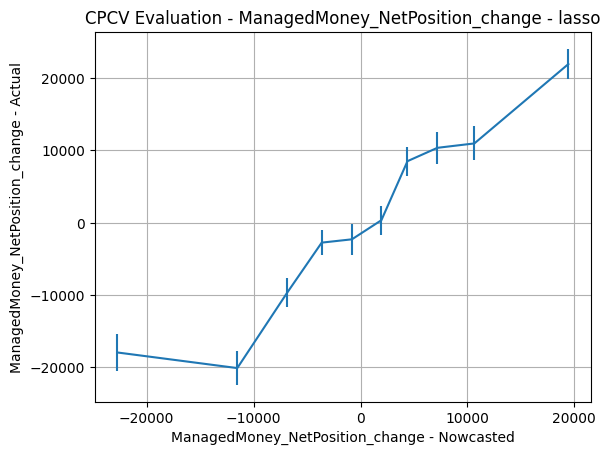

ridge: score=0.4668, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


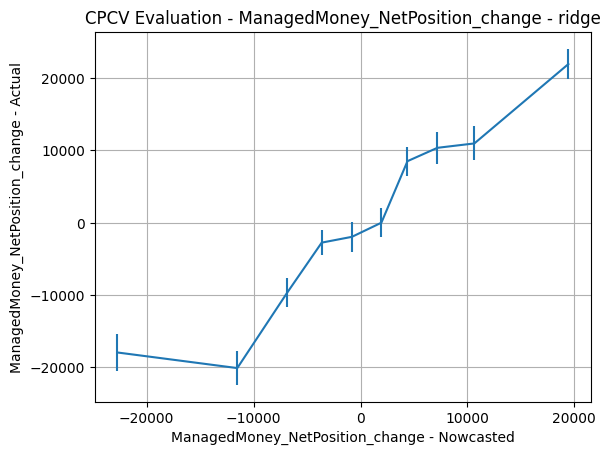

rf: score=0.5388, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}


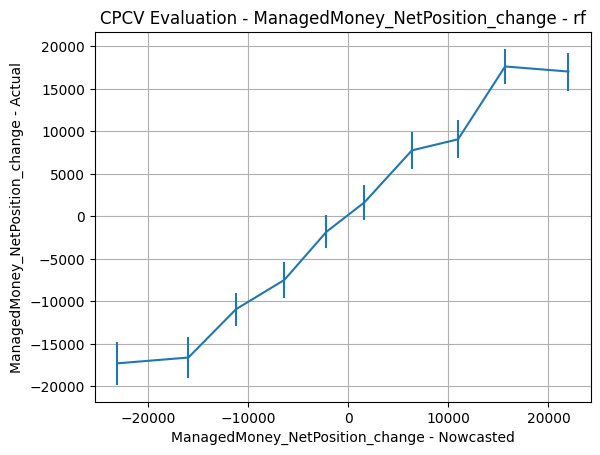

hgbm: score=0.4896, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


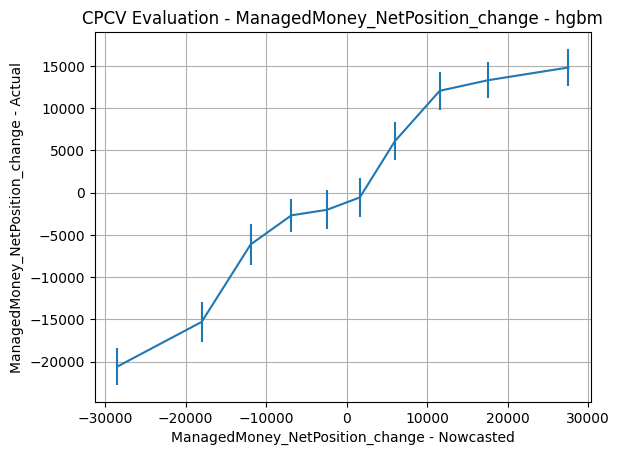

ols: score=0.4668, params={'model': 'ols'}
{}


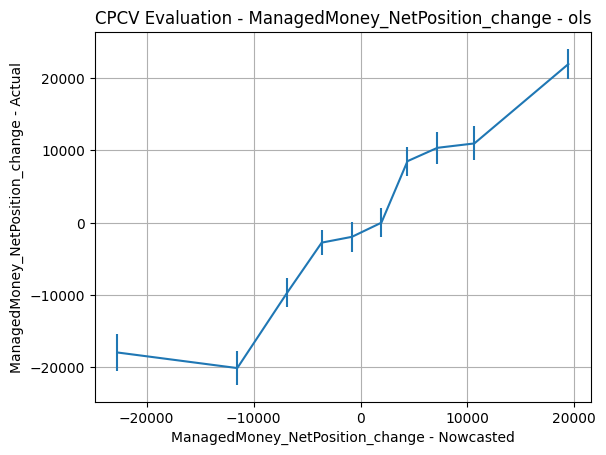

enet: score=0.4437, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


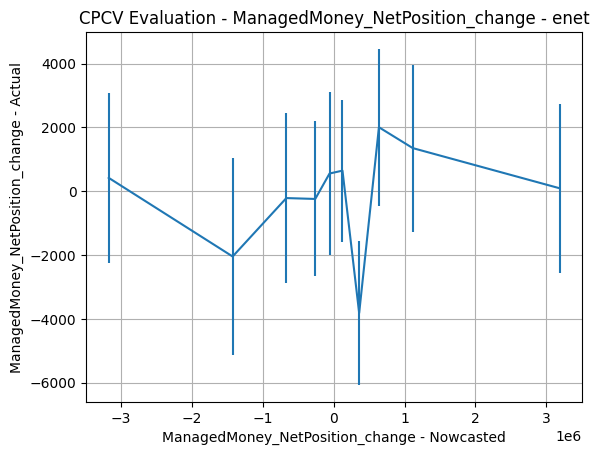

extra: score=0.5381, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}


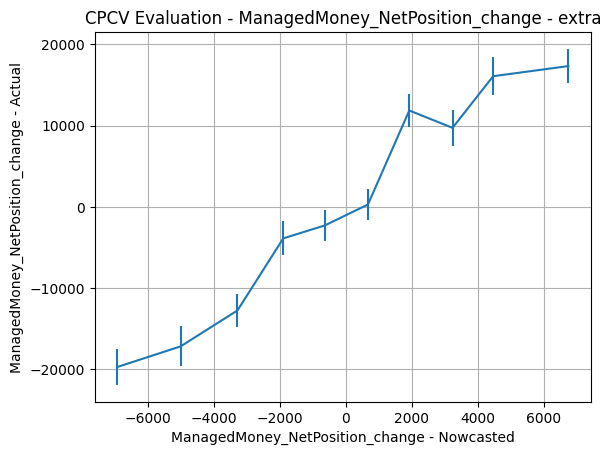

ManagedMoney_LongPosition_change
lasso: score=0.3815, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+11, tolerance: 2.192e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.817e+10, tolerance: 2.042e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

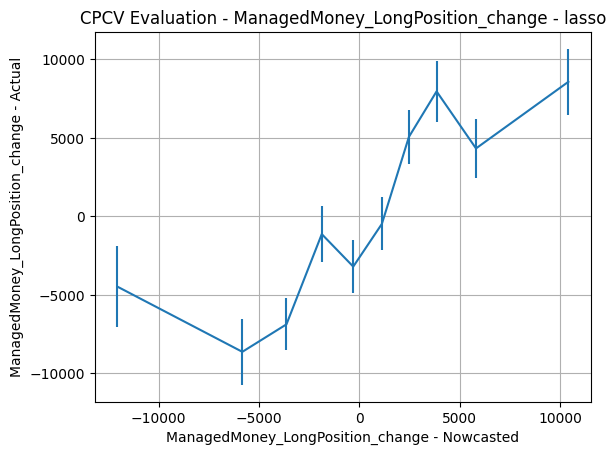

ridge: score=0.3764, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


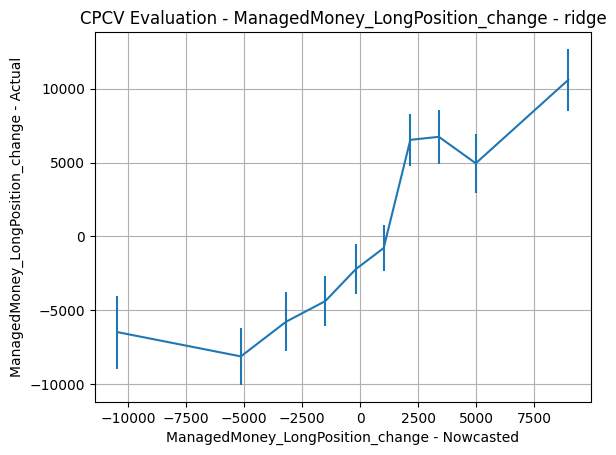

rf: score=0.4129, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}


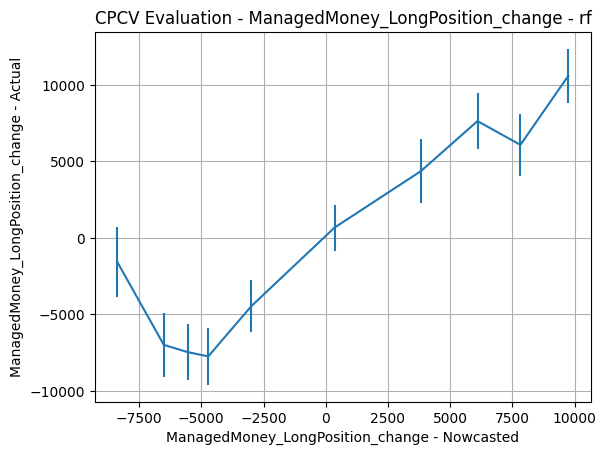

hgbm: score=0.3301, params={'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}
{'learning_rate': 0.25053236081220304, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}


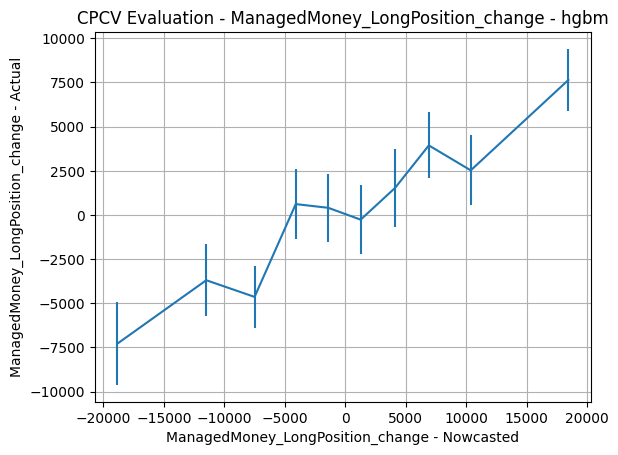

ols: score=0.3813, params={'model': 'ols'}
{}


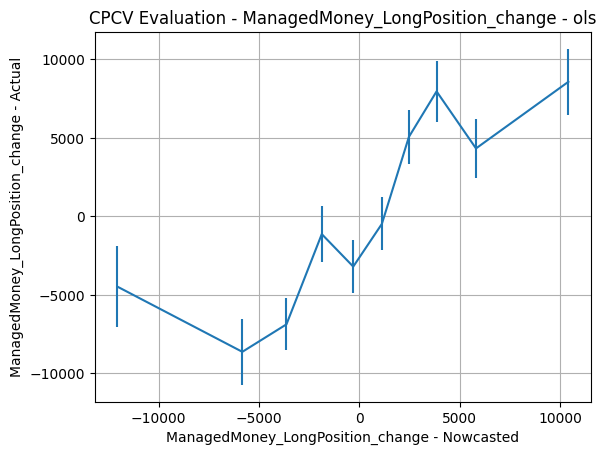

enet: score=0.2949, params={'model': 'enet', 'alpha': 2.2047292731556803e-05, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}
{'alpha': 2.2047292731556803e-05, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}


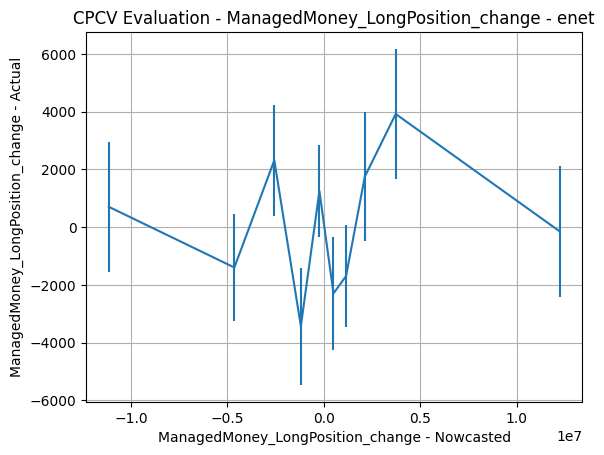

extra: score=0.4074, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}


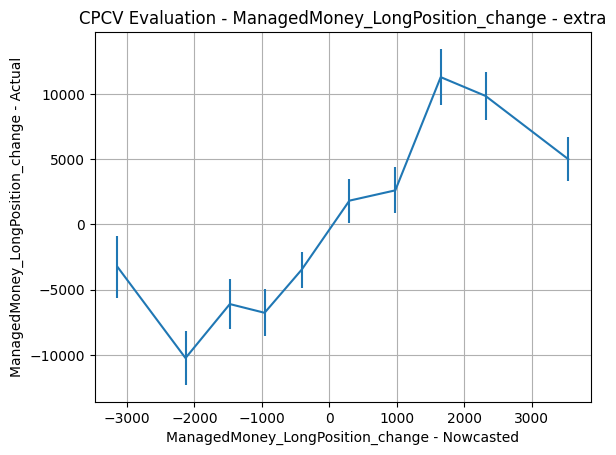

ManagedMoney_ShortPosition_change
lasso: score=0.3372, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.610e+10, tolerance: 1.991e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.555e+10, tolerance: 1.982e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

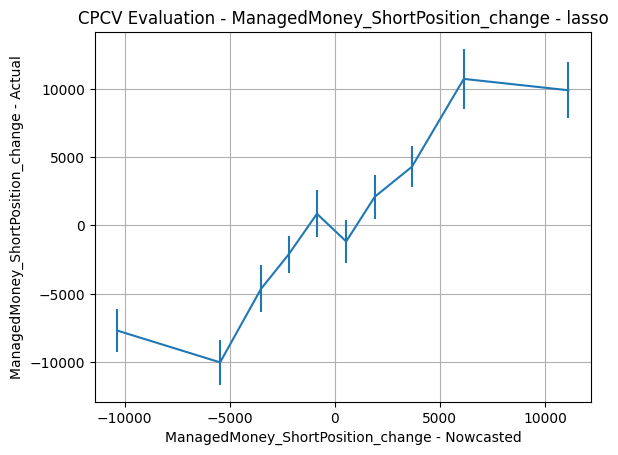

ridge: score=0.3372, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


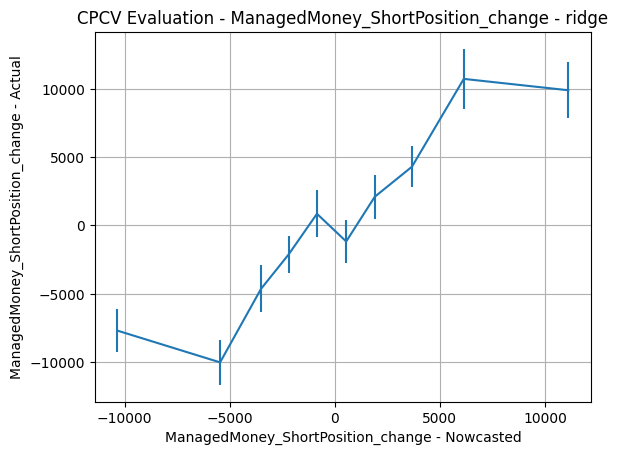

rf: score=0.3663, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}


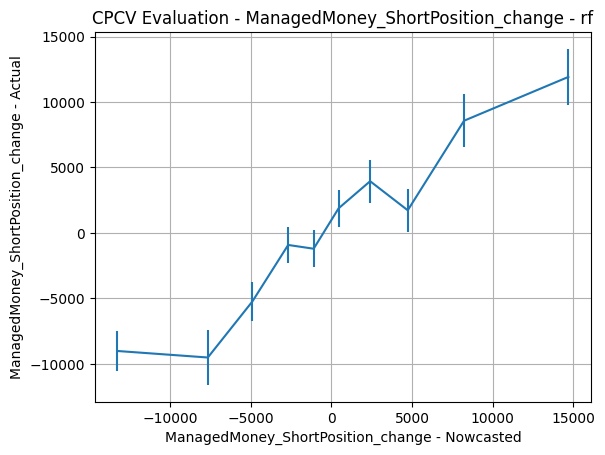

hgbm: score=0.3023, params={'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 15, 'max_iter': 700, 'l2_regularization': 0.5759875122445917, 'max_leaf_nodes': 144}
{'learning_rate': 0.2950581131879257, 'max_depth': 15, 'max_iter': 700, 'l2_regularization': 0.5759875122445917, 'max_leaf_nodes': 144}


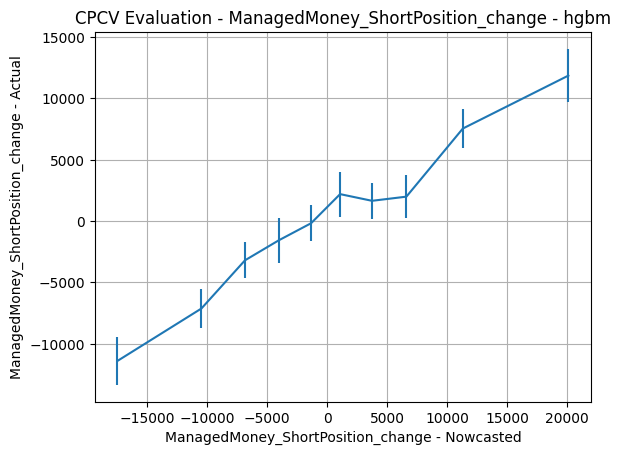

ols: score=0.3372, params={'model': 'ols'}
{}


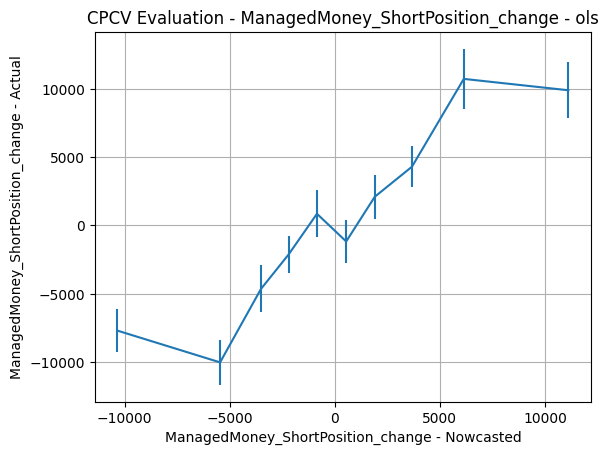

enet: score=0.2807, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


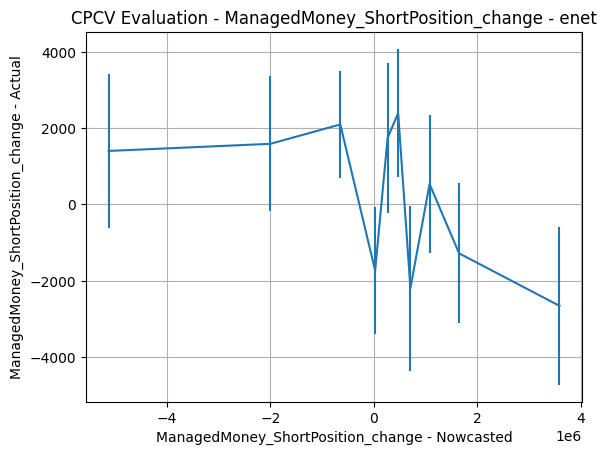

extra: score=0.3623, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


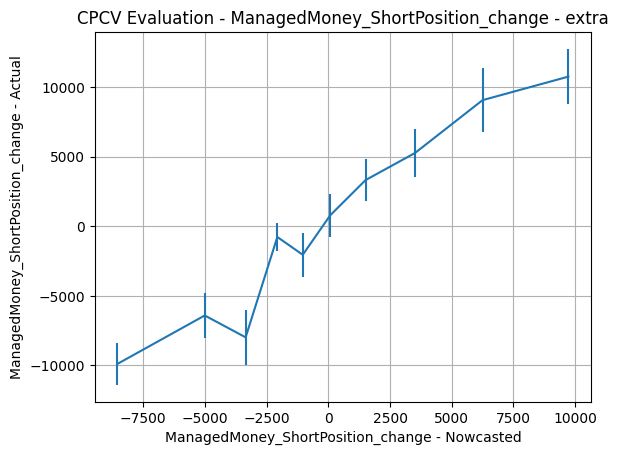

ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0478, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


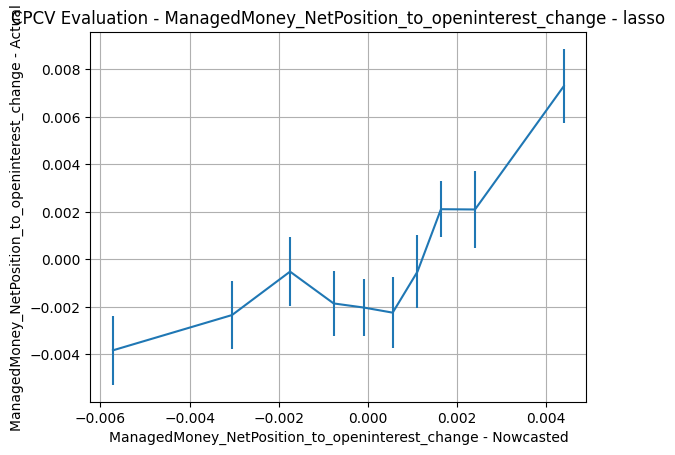

ridge: score=0.5450, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


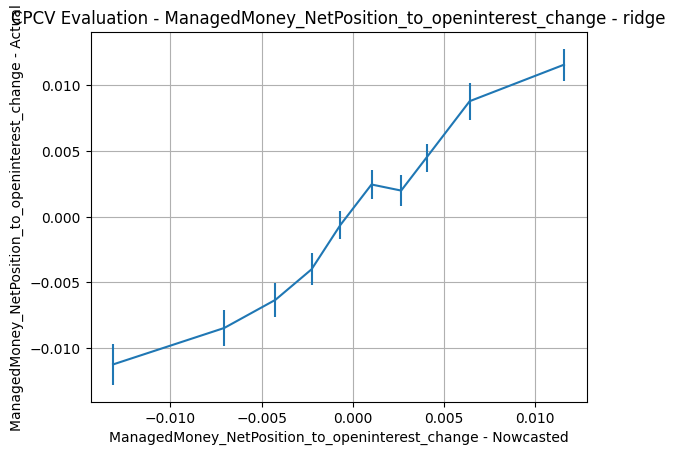

rf: score=0.6076, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


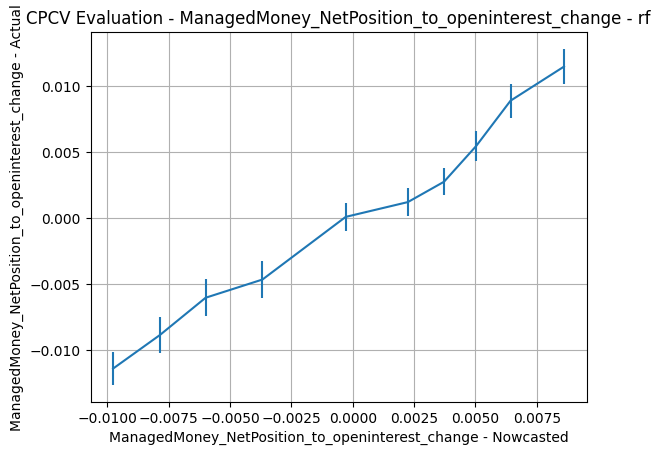

hgbm: score=0.5838, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


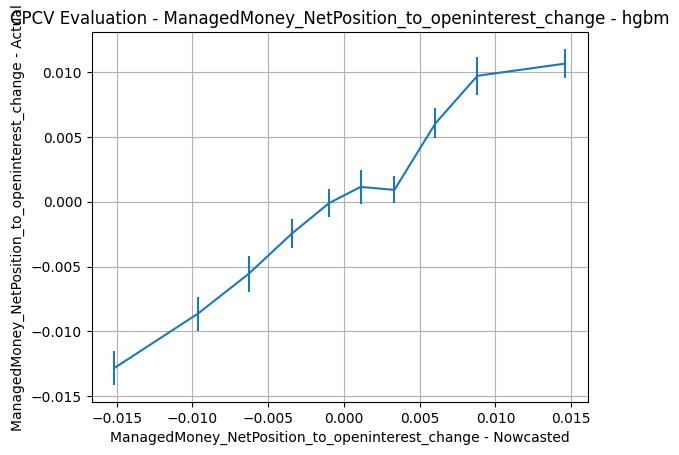

ols: score=0.5450, params={'model': 'ols'}
{}


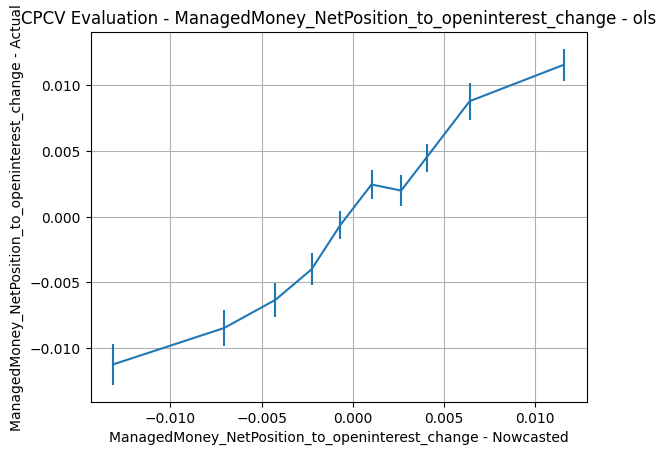

enet: score=0.3428, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


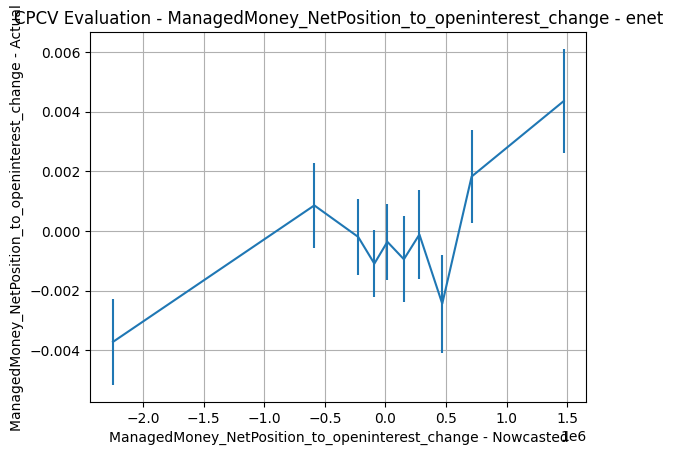

extra: score=0.6071, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


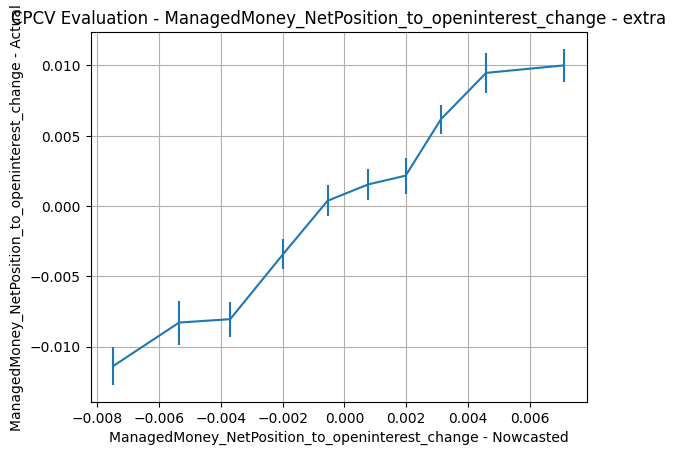

ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0488, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


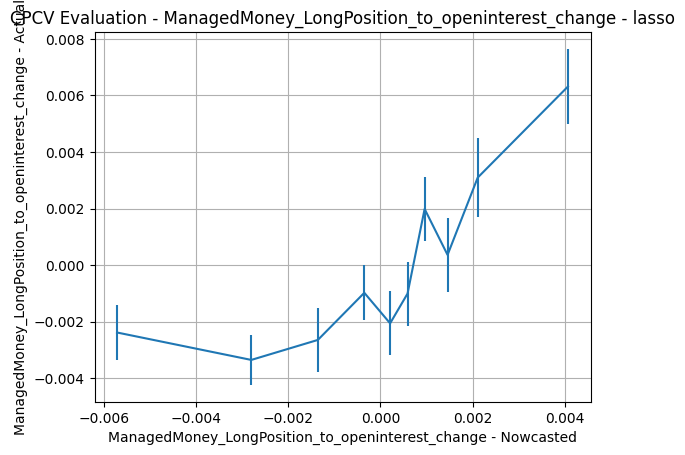

ridge: score=0.5028, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


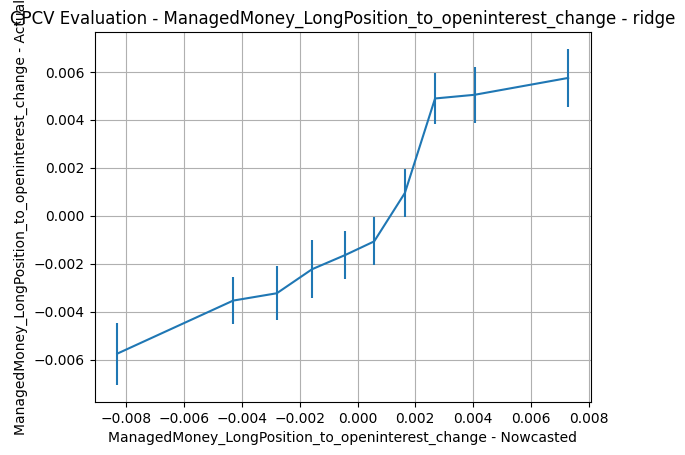

rf: score=0.5378, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}


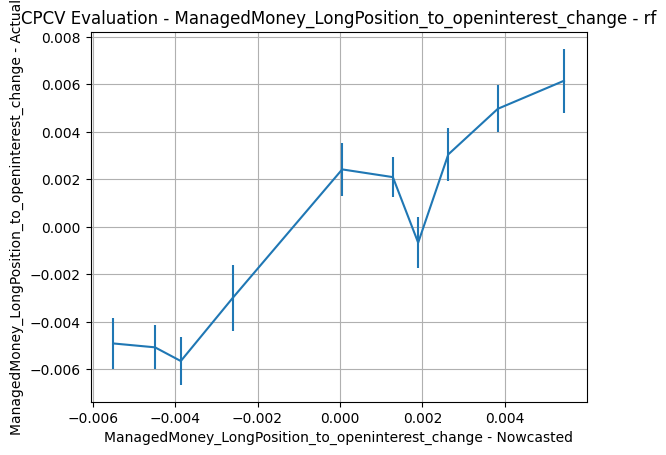

hgbm: score=0.4638, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


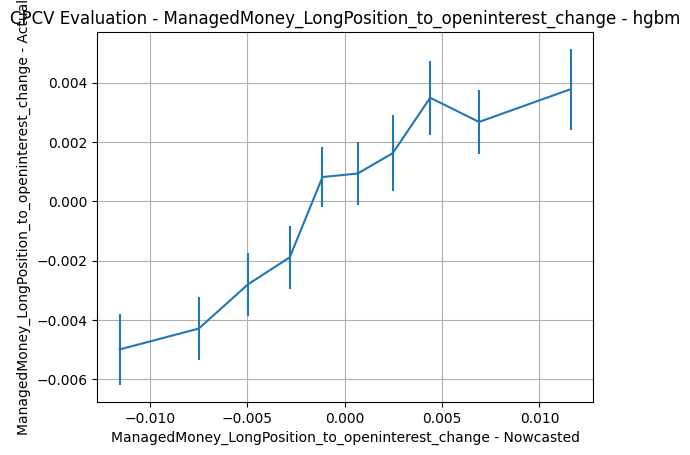

ols: score=0.5028, params={'model': 'ols'}
{}


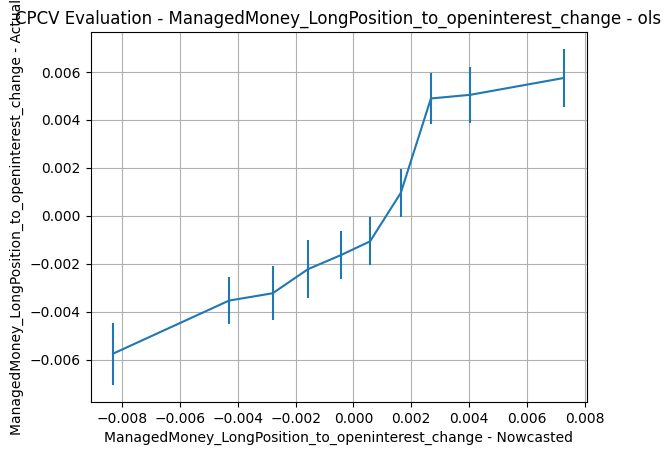

enet: score=-0.0295, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


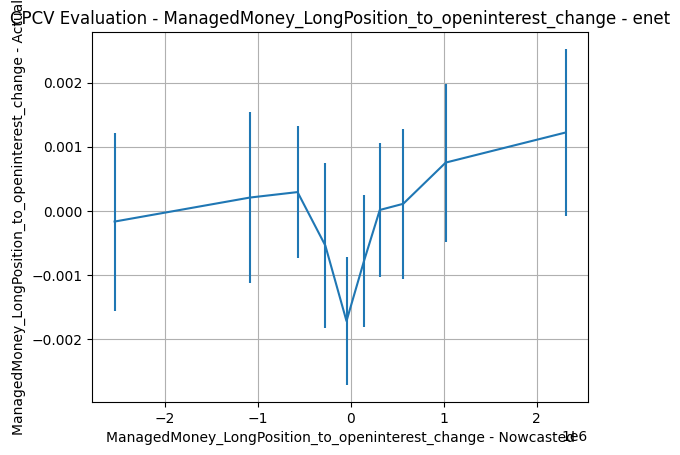

extra: score=0.5343, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


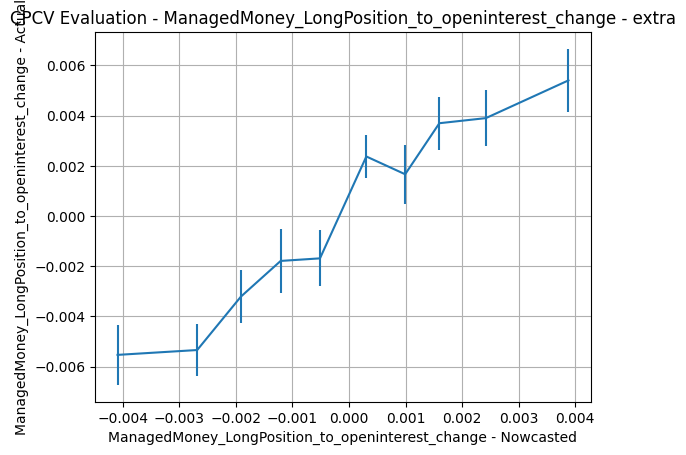

ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0491, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


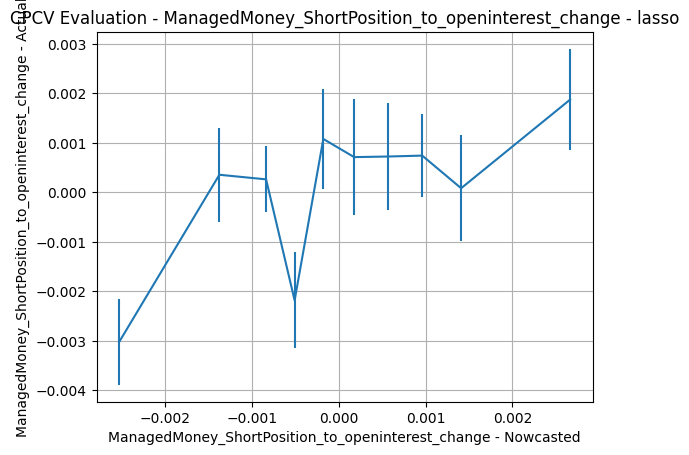

ridge: score=0.3312, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


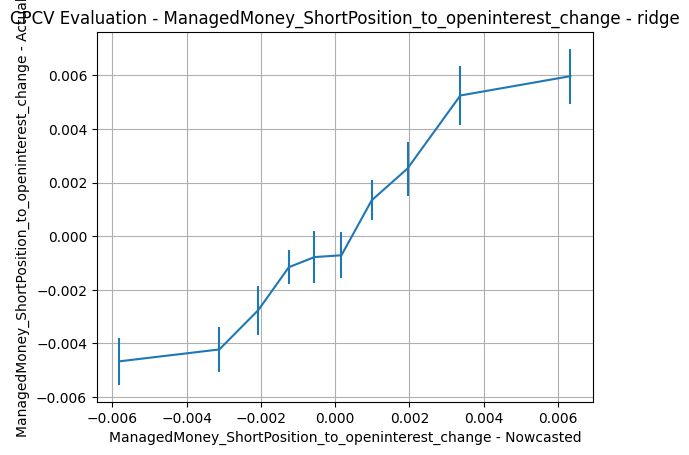

rf: score=0.4163, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


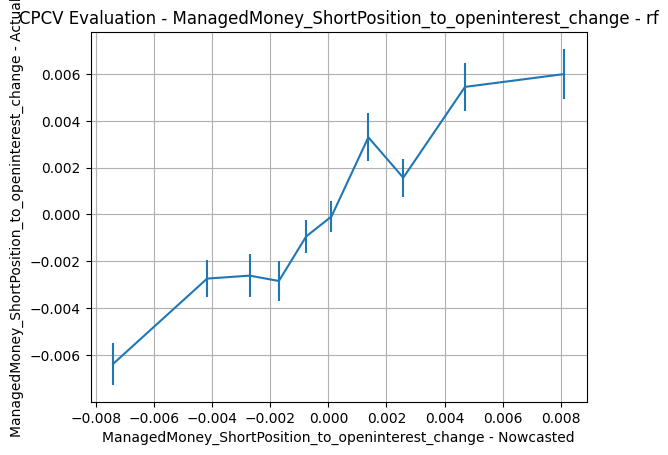

hgbm: score=0.3908, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
{'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}


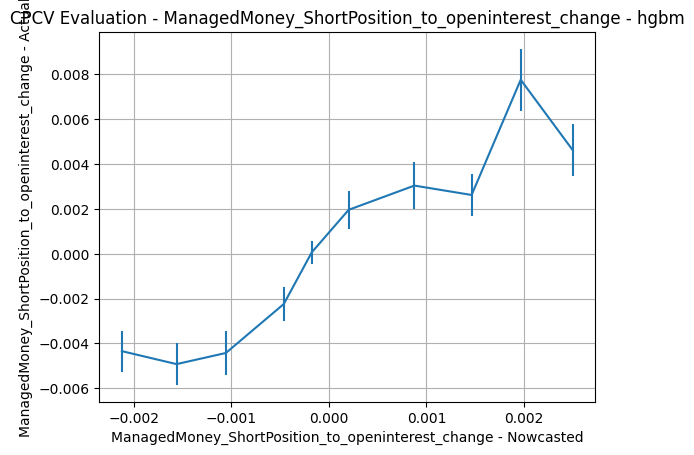

ols: score=0.3312, params={'model': 'ols'}
{}


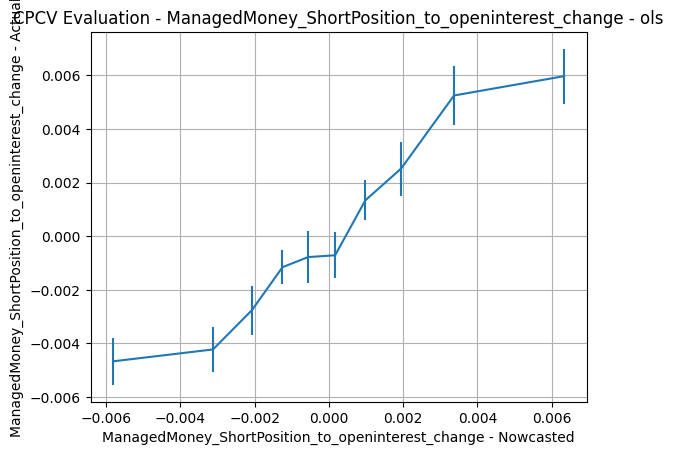

enet: score=-0.0466, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


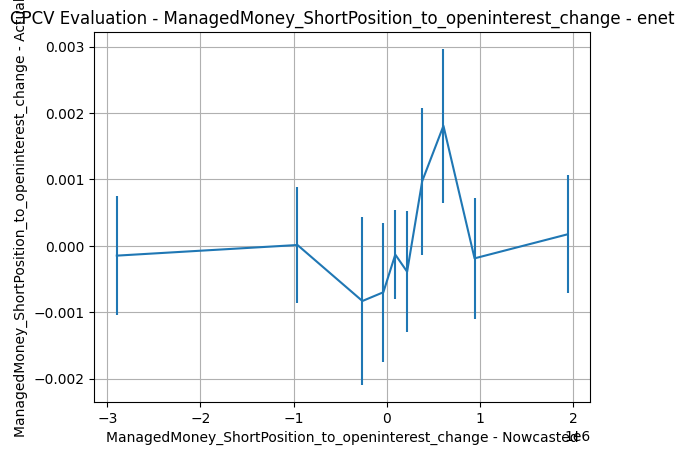

extra: score=0.4131, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


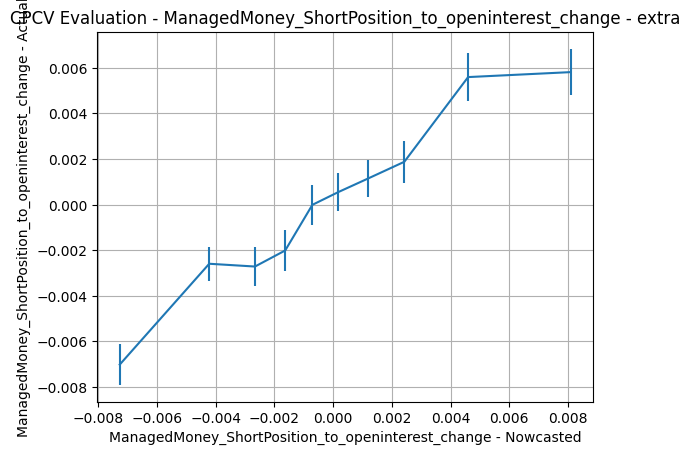

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
ManagedMoney_NetPosition_change,0.457141,0.457124,0.529220,0.486942,0.457124,0.037484,0.546843
ManagedMoney_LongPosition_change,0.227300,0.256988,0.319365,0.227913,0.227269,0.031440,0.299098
ManagedMoney_ShortPosition_change,0.309092,0.309090,0.380703,0.381540,0.309090,-0.042914,0.383641
ManagedMoney_NetPosition_to_openinterest_change,0.204493,0.478859,0.539513,0.534533,0.478859,0.155733,0.540047
ManagedMoney_LongPosition_to_openinterest_change,0.232159,0.329903,0.368578,0.271869,0.329903,0.027749,0.347561
ManagedMoney_ShortPosition_to_openinterest_change,0.120104,0.331226,0.415271,0.390849,0.331226,0.023147,0.412542


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_per_response

{'ManagedMoney_NetPosition_change': 'extra',
 'ManagedMoney_LongPosition_change': 'rf',
 'ManagedMoney_ShortPosition_change': 'extra',
 'ManagedMoney_NetPosition_to_openinterest_change': 'extra',
 'ManagedMoney_LongPosition_to_openinterest_change': 'rf',
 'ManagedMoney_ShortPosition_to_openinterest_change': 'rf'}

In [40]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

ManagedMoney_NetPosition_change
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}
ManagedMoney_LongPosition_change
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_ShortPosition_change
{'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [41]:
final_selected_model_and_parameters_per_response

{'ManagedMoney_NetPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 23,
   'min_samples_leaf': 9,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 9,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 13,
   'min_samples_leaf': 3,
   'max_features': 'sqrt'}},
 'ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 400,
   'max_depth'

In [42]:
import json
with open("wti_cot_mm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)

In [43]:
## Cache: Model Selection CV Scores (nowcast)
from src.settings import OUTPUT_DIR

nowcast_output_dir = OUTPUT_DIR / "wti" / "mm" / "nowcast"
nowcast_output_dir.mkdir(parents=True, exist_ok=True)

model_selection_cache = {
    "ticker": "wti",
    "investor_type": "mm",
    "horizon": "nowcast",
    "responses": {}
}

for response_name in responses_study:
    study = responses_study[response_name]
    best_per_model = responses_best_per_model[response_name]
    perf_map = response_performance_map[response_name]
    
    optuna_trials = []
    for trial in study.trials:
        if trial.state.name == "COMPLETE":
            optuna_trials.append({
                "number": trial.number,
                "model": trial.params.get("model", ""),
                "score": trial.value,
                "params": {k: v for k, v in trial.params.items()}
            })
    
    best_per_model_serializable = {}
    for model_name, info in best_per_model.items():
        best_per_model_serializable[model_name] = {
            "score": info["score"],
            "params": {k: v for k, v in info["params"].items() if k != "model"}
        }
    
    selected_model = final_selected_model_per_response[response_name]
    selected_params = final_selected_model_and_parameters_per_response[response_name]["params"]
    
    model_selection_cache["responses"][response_name] = {
        "cpcv_correlation_by_model": {k: float(v) for k, v in perf_map.items()},
        "best_per_model_params": best_per_model_serializable,
        "selected_model": selected_model,
        "selected_model_params": selected_params,
        "optuna_trial_history": optuna_trials
    }

with open(nowcast_output_dir / "03_model_selection_cv_scores.json", "w") as f:
    json.dump(model_selection_cache, f, indent=2)

with open(nowcast_output_dir / "03_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f, indent=2)

print(f"Saved 03_model_selection_cv_scores.json and 03_selected_model_by_response.json to {nowcast_output_dir}")

Saved 03_model_selection_cv_scores.json and 03_selected_model_by_response.json to /Users/oualid/Documents/Projects/omroot_repos/COTAME/cache/output/wti/mm/nowcast
